# Example Sub-notebook

In [1]:
%matplotlib inline


In [2]:
import os

import numpy as np
import pandas as pd
import json
import os
import yaml
from loguru import logger
from matplotlib import pyplot as plt
from survos2 import survos

from survos2.frontend.control import Launcher
from survos2.model import DataModel
from survos2.improc.utils import DatasetManager
from survos2.server.pipeline import run_workflow
from survos2.server.state import cfg
from survos2.server.pipeline import view_dataset
from survos2.frontend.nb_utils import start_server, stop_server
from mlflow_utils import log_mlflow, plot_image

In [3]:
import papermill as pm

In [4]:
from mlflow_config import EXPERIMENT, RUN_NAME, ARTIFACT_DIR

In [5]:
workspace_name = 'vf_main2_sept11_roi_0_128_308_698_338_723'
port = 8875
method='U_NET_PLUS_PLUS'
loss_criterion='BCEDiceLoss'
encoder_type='resnet34'

In [6]:
# Parameters
workspace_name = "vf_main_feb2023"
port = 8863
method = "attention_unet"
loss_criterion = "BCEDiceLoss"
encoder_type = "resnet50"


In [7]:

run_params = {'experiment': EXPERIMENT,
              'iteration': RUN_NAME,
              'artifact_dir': ARTIFACT_DIR,
              'workspace_name': workspace_name,
              'method':method,
              'loss_criterion':loss_criterion,
              'encoder_type':encoder_type}

In [8]:
run_params

{'experiment': 'seg_testA',
 'iteration': 'initialtest',
 'artifact_dir': 'artifact_dir',
 'workspace_name': 'vf_main_feb2023',
 'method': 'attention_unet',
 'loss_criterion': 'BCEDiceLoss',
 'encoder_type': 'resnet50'}

In [9]:
server_process = start_server(port)

INFO:     Started server process [82264]
INFO - Started server process [82264]  - uvicorn.server:serve:75
INFO:     Waiting for application startup.
INFO - Waiting for application startup.  - uvicorn.lifespan.on:startup:47
INFO:     Application startup complete.
INFO - Application startup complete.  - uvicorn.lifespan.on:startup:61
INFO:     Uvicorn running on http://127.0.0.1:8863 (Press CTRL+C to quit)
INFO - Uvicorn running on http://127.0.0.1:8863 (Press CTRL+C to quit)  - uvicorn.server:_log_started_message:207


In [10]:
DataModel.g.current_workspace = workspace_name
DataModel.g.current_session = 'default'

In [11]:
server_uri = '127.0.0.1:' + str(port)

In [12]:
Launcher.g.set_remote(server_uri)
DataModel.g.server_uri = server_uri

INFO - Launcher setting remote to 127.0.0.1:8863  - survos2.frontend.control.launcher:set_remote:85


In [13]:
Launcher.g.run('workspace', 'set_workspace', workspace=workspace_name)

INFO:     127.0.0.1:56894 - "GET /workspace/set_workspace?workspace=vf_main_feb2023 HTTP/1.1" 200 OK


In [14]:
Launcher.g.run('features', 'existing', workspace=workspace_name)

INFO:     127.0.0.1:56894 - "GET /features/existing?workspace=vf_main_feb2023 HTTP/1.1" 200 OK


{'001_raw': {'kind': 'raw', 'name': '001 Raw', 'id': '001_raw'},
 '002_raw': {'kind': 'raw', 'name': 'Entity_dbscan_class1', 'id': '002_raw'},
 '003_raw': {'kind': 'raw', 'name': 'Entity_dbscan_class2', 'id': '003_raw'},
 '004_raw': {'kind': 'raw',
  'name': 'Entity_dbscan_class_all',
  'id': '004_raw'},
 '005_logit_map': {'kind': 'raw',
  'name': '005 Logit Map',
  'id': '005_logit_map'},
 '006_logit_map': {'kind': 'raw',
  'name': '006 Logit Map',
  'id': '006_logit_map'},
 '007_logit_map': {'kind': 'raw',
  'name': '007 Logit Map',
  'id': '007_logit_map'},
 '008_logit_map': {'kind': 'raw',
  'name': '008 Logit Map',
  'id': '008_logit_map'},
 '009_logit_map': {'kind': 'raw',
  'name': '009 Logit Map',
  'id': '009_logit_map'},
 '010_logit_map': {'kind': 'raw',
  'name': '010 Logit Map',
  'id': '010_logit_map'},
 '011_logit_map': {'kind': 'raw',
  'name': '011 Logit Map',
  'id': '011_logit_map'},
 '012_logit_map': {'kind': 'raw',
  'name': '012 Logit Map',
  'id': '012_logit_map'}

In [15]:
Launcher.g.run('annotations', 'get_levels', workspace=workspace_name)

INFO:     127.0.0.1:56894 - "GET /annotations/get_levels?workspace=vf_main_feb2023 HTTP/1.1" 200 OK


[{'kind': 'level',
  'labels': {'2': {'color': '#50ae6f',
    'idx': 2,
    'name': 'Label',
    'visible': True},
   '3': {'color': '#3e19ae', 'idx': 3, 'name': 'Label', 'visible': True},
   '4': {'color': '#ffaaff', 'idx': 4, 'name': 'Label', 'visible': True},
   '5': {'color': '#7c4989', 'idx': 5, 'name': 'Label', 'visible': True},
   '6': {'color': '#10b8c7', 'idx': 6, 'name': 'Label', 'visible': True}},
  'modified': [1],
  'name': '002 Level',
  'id': '002_level'},
 {'kind': 'level',
  'labels': {'2': {'color': '#782506', 'idx': 2, 'name': '1', 'visible': True},
   '3': {'color': '#5bd5f8', 'idx': 3, 'name': '2', 'visible': True},
   '4': {'color': '#9289e8', 'idx': 4, 'name': '3', 'visible': True},
   '5': {'color': '#55ff7f', 'idx': 5, 'name': 'Label', 'visible': True},
   '6': {'color': '#5a2254', 'idx': 6, 'name': 'Label', 'visible': True},
   '7': {'color': '#5a3737', 'idx': 7, 'name': 'Label', 'visible': True}},
  'modified': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
  

In [16]:
feature_name = '001_raw'

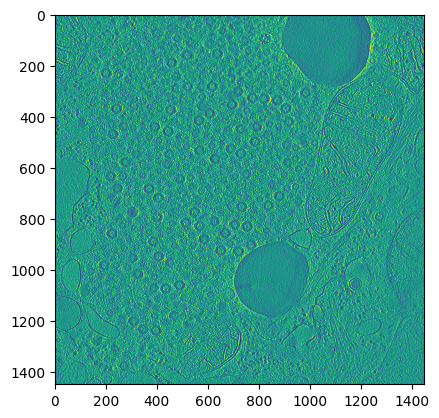

In [17]:
feature_array = view_dataset(feature_name, 'features', 50)

In [18]:
#log_mlflow(run_params, feature_name, np.mean(feature_array), feature_array[50,:])

# Multi-axis CNN

In [19]:
result = Launcher.g.run('pipelines', 'create', workspace=workspace_name, pipeline_type="train_3d_cnn")

INFO:     127.0.0.1:56894 - "GET /pipelines/create?pipeline_type=train_3d_cnn&workspace=vf_main_feb2023 HTTP/1.1" 200 OK


INFO - Creating dataset on /ceph/users/fot15858/chroot/vf_main_feb2023/default/pipelines/032_train_3d_cnn of shape [128, 1450, 1450] of dtype float32 with data None in chunks [128, 182, 112]  - survos2.model.dataset:create:241


In [20]:
result

{'name': '032 Train 3D Cnn', 'kind': 'train_3d_cnn', 'id': '032_train_3d_cnn'}

In [21]:
pipeline_name = result['id']

In [22]:
src = DataModel.g.dataset_uri(pipeline_name, group="pipelines")
src

'survos://default@vf_main_feb2023:pipelines/032_train_3d_cnn'

In [23]:
DataModel.g.current_workspace

'vf_main_feb2023'

In [24]:
dst = src

In [25]:
params = {
  'src': src,
  'dst': dst,  
  'anno_id': '014_level',
  'feature_id': '001_raw',
  'objects_id': '002_points',
  'kind': 'train_3d_cnn',
  'source': '001_raw',
  'workspace': workspace_name,
  'id': pipeline_name,
  'num_samples': 400,
  'num_epochs': 4,
  'num_augs': 1,
  'patch_size': (64,64,64),  # = 64,
  'patch_overlap': (48,48,48),  # 16
  'fcn_type': method,
  'bce_to_dice_weight': 0.5,
  'threshold': 0.5
}

In [26]:
result = Launcher.g.run('pipelines', 'train_3d_cnn', json_transport=False, **params)

()
{'anno_id': '014_level',
 'bce_to_dice_weight': 0.5,
 'fcn_type': 'attention_unet',
 'feature_id': '001_raw',
 'num_augs': 1,
 'num_epochs': 4,
 'num_samples': 400,
 'objects_id': '002_points',
 'patch_overlap': [48, 48, 48],
 'patch_size': [64, 64, 64],
 'threshold': 0.5,
 'workspace': 'vf_main_feb2023'}


Reading entity csv: /ceph/users/fot15858/chroot/vf_main_feb2023/default/objects/002_points/7fb633cdea3495da3a2d16d79634345f603562fc6f7fcc5c.csv
     Unnamed: 0   z    x    y  class_code
0             0  41  422  916           0
1             1  52  956  227           0
2             2  46  754  731           0
3             3  79  756  670           0
4             4  38  955  305           0
..          ...  ..  ...  ...         ...
859         859  60  334  401           0
860         860  53  911  189           0
861         861  59  339  307           0
862         862  30  882  462           0
863         863  38  353  195           0

[864 rows x 5 columns]
False
----------------------------------------------------------------------------------------------------


Making patches for 864 locations
Making 864 bvols


Plotting at location: 64, 725, 725


Augmented point locations (864, 4)
Plotting at location: 64, 725, 725


Generating 864 patch volumes from image of shape (256, 1578, 1578)


Generated 864 MarkedPatches of shape (864, 64, 64, 64)
Generating 864 patch volumes from image of shape (256, 1578, 1578)


Generated 864 MarkedPatches of shape (864, 64, 64, 64)


Marked patches, unique label vols [0. 1.], img mean: 0.52824971895415


raw_X_train (2073, 64, 64, 64), raw_X_test (519, 64, 64, 64), raw_y_train(2073, 64, 64, 64), raw_y_test(519, 64, 64, 64)


Figure(1200x1200)
Figure(1100x1100)
Figure(1100x1100)
Figure(1200x1200)
Figure(1100x1100)
Figure(1100x1100)
Figure(800x800)
Unique mask values: [0. 1.]


Figure(800x800)
Unique mask values: [0.]


Figure(800x800)
Unique mask values: [0. 1.]


Figure(800x800)
Unique mask values: [0. 1.]


Figure(800x800)
Unique mask values: [0. 1.]
Figure(800x800)
Unique mask values: [0.]


Figure(800x800)
Unique mask values: [0. 1.]
Figure(800x800)
Unique mask values: [0.]


Figure(800x800)
Unique mask values: [0. 1.]


Figure(800x800)
Unique mask values: [0.]
Augmented image vols shape (2592, 64, 64, 64), label vols shape (2592, 64, 64, 64)


Saving image vols /ceph/users/fot15858/chroot/vf_main_feb2023/default/annotations/014_level/vf_main_feb2023_patch_vols2592_img_vols_1002_1752.h5


Saving image vols /ceph/users/fot15858/chroot/vf_main_feb2023/default/annotations/014_level/vf_main_feb2023_patch_vols2592_img_labels_1002_1752.h5


Saving image vols /ceph/users/fot15858/chroot/vf_main_feb2023/default/annotations/014_level/vf_main_feb2023_patch_vols_2592_mask_gt_1002_1752.h5


INFO - Saving fcn model to: /ceph/users/fot15858/chroot/vf_main_feb2023/fcn/10022023_17_52_35_trained_fcn_model  - survos2.api.pipelines:train_3d_cnn:730


<KeysViewHDF5 ['data']>


<KeysViewHDF5 ['data']>


(2592, 64, 64, 64) (2592, 64, 64, 64)


Prepared train X : (2332, 64, 64, 64) and train y: (2332, 64, 64, 64)  and test X: (260, 64, 64, 64) and test y (260, 64, 64, 64)


Training:   0%|          | 0/2332 [00:00<?, ?it/s]


Training: (loss 0.9775):   0%|          | 3/2332 [00:02<22:54,  1.69it/s]


Training: (loss 0.9747):   0%|          | 8/2332 [00:02<06:39,  5.81it/s]


Training: (loss 0.9125):   1%|          | 15/2332 [00:02<03:02, 12.69it/s]


Training: (loss 0.9757):   1%|          | 18/2332 [00:02<02:35, 14.90it/s]


Training: (loss 0.6019):   1%|          | 21/2332 [00:03<02:33, 15.03it/s]


Training: (loss 0.6511):   1%|          | 24/2332 [00:03<03:02, 12.64it/s]


Training: (loss 0.6873):   1%|          | 26/2332 [00:03<03:32, 10.86it/s]


Training: (loss 0.9476):   1%|▏         | 32/2332 [00:03<02:23, 16.08it/s]


Training: (loss 0.6064):   2%|▏         | 38/2332 [00:04<01:52, 20.43it/s]


Training: (loss 0.8172):   2%|▏         | 45/2332 [00:04<01:33, 24.41it/s]


Training: (loss 0.7132):   2%|▏         | 48/2332 [00:04<01:31, 25.09it/s]


Training: (loss 0.6119):   2%|▏         | 54/2332 [00:04<01:28, 25.61it/s]


Training: (loss 0.6792):   3%|▎         | 61/2332 [00:04<01:19, 28.44it/s]


Training: (loss 0.8696):   3%|▎         | 69/2332 [00:05<01:18, 28.94it/s]


Training: (loss 0.7931):   3%|▎         | 73/2332 [00:05<01:15, 29.77it/s]


Training: (loss 0.6984):   3%|▎         | 81/2332 [00:05<01:17, 28.92it/s]


Training: (loss 0.5907):   4%|▎         | 87/2332 [00:05<01:18, 28.66it/s]


Training: (loss 0.6398):   4%|▍         | 94/2332 [00:06<01:17, 29.04it/s]


Training: (loss 0.6390):   4%|▍         | 98/2332 [00:06<01:15, 29.74it/s]


Training: (loss 0.9587):   5%|▍         | 106/2332 [00:06<01:19, 28.10it/s]


Training: (loss 0.9465):   5%|▍         | 109/2332 [00:06<01:27, 25.36it/s]


Training: (loss 0.6525):   5%|▍         | 115/2332 [00:06<01:24, 26.20it/s]


Training: (loss 0.5511):   5%|▌         | 122/2332 [00:07<01:17, 28.45it/s]


Training: (loss 0.6777):   6%|▌         | 129/2332 [00:07<01:17, 28.57it/s]


Training: (loss 0.9501):   6%|▌         | 135/2332 [00:07<01:15, 28.91it/s]


Training: (loss 0.7750):   6%|▌         | 141/2332 [00:07<01:18, 27.98it/s]


Training: (loss 0.5717):   6%|▋         | 147/2332 [00:08<01:17, 28.12it/s]


Training: (loss 0.8169):   7%|▋         | 154/2332 [00:08<01:21, 26.63it/s]


Training: (loss 0.7459):   7%|▋         | 161/2332 [00:08<01:19, 27.26it/s]


Training: (loss 0.4865):   7%|▋         | 165/2332 [00:08<01:17, 28.11it/s]


Training: (loss 0.8648):   7%|▋         | 171/2332 [00:08<01:17, 27.77it/s]


Training: (loss 0.6061):   8%|▊         | 177/2332 [00:09<01:32, 23.28it/s]


Training: (loss 0.5881):   8%|▊         | 180/2332 [00:09<01:26, 24.78it/s]


Training: (loss 0.5646):   8%|▊         | 187/2332 [00:09<01:21, 26.34it/s]


Training: (loss 0.5232):   8%|▊         | 193/2332 [00:09<01:19, 26.78it/s]


Training: (loss 0.6458):   9%|▊         | 199/2332 [00:09<01:19, 26.85it/s]


Training: (loss 0.5579):   9%|▉         | 205/2332 [00:10<01:19, 26.87it/s]


Training: (loss 0.9547):   9%|▉         | 211/2332 [00:10<01:18, 27.03it/s]


Training: (loss 0.5499):   9%|▉         | 218/2332 [00:10<01:17, 27.24it/s]


Training: (loss 0.8329):  10%|▉         | 224/2332 [00:10<01:22, 25.60it/s]


Training: (loss 0.8066):  10%|▉         | 227/2332 [00:11<01:25, 24.75it/s]


Training: (loss 0.8269):  10%|▉         | 233/2332 [00:11<01:23, 25.25it/s]


Training: (loss 0.6662):  10%|█         | 239/2332 [00:11<01:21, 25.62it/s]


Training: (loss 0.9457):  11%|█         | 245/2332 [00:11<01:29, 23.36it/s]


Training: (loss 0.7014):  11%|█         | 251/2332 [00:11<01:25, 24.37it/s]


Training: (loss 0.6275):  11%|█         | 255/2332 [00:12<01:19, 26.11it/s]


Training: (loss 0.8095):  11%|█         | 262/2332 [00:12<01:12, 28.53it/s]


Training: (loss 0.6031):  12%|█▏        | 269/2332 [00:12<01:10, 29.27it/s]


Training: (loss 0.6063):  12%|█▏        | 275/2332 [00:12<01:11, 28.63it/s]


Training: (loss 0.9151):  12%|█▏        | 281/2332 [00:13<01:20, 25.51it/s]


Training: (loss 0.7895):  12%|█▏        | 287/2332 [00:13<01:30, 22.58it/s]


Training: (loss 0.5432):  13%|█▎        | 293/2332 [00:13<01:27, 23.43it/s]


Training: (loss 0.8504):  13%|█▎        | 296/2332 [00:13<01:43, 19.59it/s]


Training: (loss 0.9010):  13%|█▎        | 302/2332 [00:13<01:30, 22.52it/s]


Training: (loss 0.8359):  13%|█▎        | 308/2332 [00:14<01:24, 24.05it/s]


Training: (loss 0.8412):  13%|█▎        | 312/2332 [00:14<01:28, 22.88it/s]


Training: (loss 0.6510):  14%|█▎        | 320/2332 [00:14<01:14, 27.09it/s]


Training: (loss 0.9291):  14%|█▍        | 326/2332 [00:14<01:15, 26.56it/s]


Training: (loss 0.8695):  14%|█▍        | 332/2332 [00:15<01:16, 26.24it/s]


Training: (loss 0.6070):  14%|█▍        | 335/2332 [00:15<01:30, 22.10it/s]


Training: (loss 0.7112):  15%|█▍        | 342/2332 [00:15<01:16, 26.14it/s]


Training: (loss 0.5316):  15%|█▍        | 345/2332 [00:15<01:19, 24.99it/s]


Training: (loss 0.5478):  15%|█▌        | 352/2332 [00:16<01:22, 24.00it/s]


Training: (loss 0.5675):  15%|█▌        | 360/2332 [00:16<01:11, 27.64it/s]


Training: (loss 0.5509):  16%|█▌        | 367/2332 [00:16<01:08, 28.71it/s]


Training: (loss 0.5186):  16%|█▌        | 370/2332 [00:16<01:14, 26.17it/s]


Training: (loss 0.6934):  16%|█▌        | 376/2332 [00:16<01:20, 24.19it/s]


Training: (loss 0.9211):  16%|█▋        | 382/2332 [00:17<01:21, 23.81it/s]


Training: (loss 0.9405):  17%|█▋        | 388/2332 [00:17<01:18, 24.80it/s]


Training: (loss 0.7519):  17%|█▋        | 394/2332 [00:17<01:13, 26.43it/s]


Training: (loss 0.5692):  17%|█▋        | 398/2332 [00:17<01:08, 28.11it/s]


Training: (loss 0.9494):  17%|█▋        | 404/2332 [00:18<01:07, 28.38it/s]


Training: (loss 0.5180):  18%|█▊        | 412/2332 [00:18<01:03, 30.10it/s]


Training: (loss 0.7028):  18%|█▊        | 420/2332 [00:18<01:00, 31.80it/s]


Training: (loss 0.4901):  18%|█▊        | 428/2332 [00:18<00:59, 31.95it/s]


Training: (loss 0.6786):  19%|█▊        | 432/2332 [00:18<01:03, 29.74it/s]


Training: (loss 0.6099):  19%|█▊        | 436/2332 [00:19<01:07, 27.97it/s]


Training: (loss 0.5989):  19%|█▉        | 443/2332 [00:19<01:10, 26.91it/s]


Training: (loss 0.8627):  19%|█▉        | 450/2332 [00:19<01:07, 27.68it/s]


Training: (loss 0.9309):  20%|█▉        | 456/2332 [00:19<01:13, 25.66it/s]


Training: (loss 0.8456):  20%|█▉        | 462/2332 [00:19<01:09, 26.87it/s]


Training: (loss 0.8814):  20%|█▉        | 466/2332 [00:20<01:05, 28.30it/s]


Training: (loss 0.7798):  20%|██        | 473/2332 [00:20<01:03, 29.28it/s]


Training: (loss 0.6758):  21%|██        | 481/2332 [00:20<01:06, 27.96it/s]


Training: (loss 0.8913):  21%|██        | 488/2332 [00:20<01:04, 28.77it/s]


Training: (loss 0.5193):  21%|██        | 494/2332 [00:21<01:08, 26.99it/s]


Training: (loss 0.8563):  21%|██▏       | 500/2332 [00:21<01:12, 25.18it/s]


Training: (loss 0.9285):  22%|██▏       | 506/2332 [00:21<01:13, 24.85it/s]


Training: (loss 0.5904):  22%|██▏       | 512/2332 [00:21<01:13, 24.64it/s]


Training: (loss 0.5536):  22%|██▏       | 515/2332 [00:22<01:13, 24.59it/s]


Training: (loss 0.8332):  22%|██▏       | 521/2332 [00:22<01:12, 25.00it/s]


Training: (loss 0.5815):  23%|██▎       | 528/2332 [00:22<01:04, 28.04it/s]


Training: (loss 0.5906):  23%|██▎       | 535/2332 [00:22<01:03, 28.30it/s]


Training: (loss 0.6269):  23%|██▎       | 538/2332 [00:22<01:09, 25.70it/s]


Training: (loss 0.5974):  23%|██▎       | 544/2332 [00:23<01:13, 24.18it/s]


Training: (loss 0.6820):  23%|██▎       | 547/2332 [00:23<01:19, 22.43it/s]


Training: (loss 0.6339):  24%|██▎       | 553/2332 [00:23<01:17, 23.04it/s]


Training: (loss 0.6487):  24%|██▍       | 559/2332 [00:23<01:19, 22.44it/s]


Training: (loss 0.9263):  24%|██▍       | 562/2332 [00:24<01:27, 20.22it/s]


Training: (loss 0.9352):  24%|██▍       | 568/2332 [00:24<01:16, 23.05it/s]


Training: (loss 0.5388):  25%|██▍       | 574/2332 [00:24<01:10, 24.87it/s]


Training: (loss 0.6761):  25%|██▍       | 580/2332 [00:24<01:13, 24.00it/s]


Training: (loss 0.5394):  25%|██▌       | 583/2332 [00:24<01:10, 24.79it/s]


Training: (loss 0.9319):  25%|██▌       | 589/2332 [00:25<01:16, 22.66it/s]


Training: (loss 0.6181):  26%|██▌       | 595/2332 [00:25<01:22, 21.01it/s]


Training: (loss 0.7333):  26%|██▌       | 599/2332 [00:25<01:12, 24.00it/s]


Training: (loss 0.6237):  26%|██▌       | 605/2332 [00:25<01:12, 23.92it/s]


Training: (loss 0.5272):  26%|██▌       | 611/2332 [00:26<01:06, 25.88it/s]


Training: (loss 0.5018):  26%|██▋       | 617/2332 [00:26<01:11, 24.06it/s]


Training: (loss 0.9224):  27%|██▋       | 624/2332 [00:26<01:04, 26.52it/s]


Training: (loss 0.7159):  27%|██▋       | 631/2332 [00:26<01:01, 27.49it/s]


Training: (loss 0.6650):  27%|██▋       | 638/2332 [00:26<00:58, 28.80it/s]


Training: (loss 0.6404):  28%|██▊       | 645/2332 [00:27<00:57, 29.58it/s]


Training: (loss 0.6085):  28%|██▊       | 651/2332 [00:27<00:59, 28.37it/s]


Training: (loss 0.9266):  28%|██▊       | 655/2332 [00:27<00:55, 30.06it/s]


Training: (loss 0.6391):  28%|██▊       | 663/2332 [00:27<00:54, 30.69it/s]


Training: (loss 0.5522):  29%|██▊       | 667/2332 [00:28<00:57, 29.06it/s]


Training: (loss 0.8089):  29%|██▉       | 674/2332 [00:28<00:57, 28.61it/s]


Training: (loss 0.5568):  29%|██▉       | 681/2332 [00:28<00:57, 28.83it/s]


Training: (loss 0.9177):  30%|██▉       | 688/2332 [00:28<00:55, 29.47it/s]


Training: (loss 0.5357):  30%|██▉       | 695/2332 [00:28<00:55, 29.55it/s]


Training: (loss 0.6860):  30%|███       | 701/2332 [00:29<00:59, 27.41it/s]


Training: (loss 0.6112):  30%|███       | 704/2332 [00:29<01:00, 27.11it/s]


Training: (loss 0.9164):  31%|███       | 712/2332 [00:29<00:56, 28.64it/s]


Training: (loss 0.5004):  31%|███       | 720/2332 [00:29<00:53, 30.01it/s]


Training: (loss 0.8019):  31%|███       | 724/2332 [00:30<00:57, 27.78it/s]


Training: (loss 0.9253):  31%|███▏      | 730/2332 [00:30<01:01, 26.06it/s]


Training: (loss 0.6556):  32%|███▏      | 736/2332 [00:30<01:00, 26.44it/s]


Training: (loss 0.5272):  32%|███▏      | 743/2332 [00:30<00:57, 27.48it/s]


Training: (loss 0.6425):  32%|███▏      | 749/2332 [00:30<00:57, 27.36it/s]


Training: (loss 0.5344):  32%|███▏      | 755/2332 [00:31<00:59, 26.68it/s]


Training: (loss 0.5972):  33%|███▎      | 758/2332 [00:31<00:59, 26.28it/s]


Training: (loss 0.9162):  33%|███▎      | 764/2332 [00:31<01:03, 24.56it/s]


Training: (loss 0.5332):  33%|███▎      | 770/2332 [00:31<01:00, 25.91it/s]


Training: (loss 0.5460):  33%|███▎      | 776/2332 [00:32<00:58, 26.53it/s]


Training: (loss 0.8451):  34%|███▎      | 782/2332 [00:32<01:02, 24.97it/s]


Training: (loss 0.5920):  34%|███▍      | 788/2332 [00:32<00:59, 25.75it/s]


Training: (loss 0.6339):  34%|███▍      | 792/2332 [00:32<00:59, 25.86it/s]


Training: (loss 0.5960):  34%|███▍      | 798/2332 [00:32<01:00, 25.35it/s]


Training: (loss 0.9405):  34%|███▍      | 801/2332 [00:33<01:27, 17.41it/s]


Training: (loss 0.5588):  34%|███▍      | 804/2332 [00:33<01:37, 15.63it/s]


Training: (loss 0.9263):  35%|███▍      | 808/2332 [00:33<01:45, 14.44it/s]


Training: (loss 0.6204):  35%|███▍      | 811/2332 [00:33<01:29, 17.06it/s]


Training: (loss 0.6939):  35%|███▍      | 816/2332 [00:34<01:24, 17.86it/s]


Training: (loss 0.7269):  35%|███▌      | 822/2332 [00:34<01:10, 21.27it/s]


Training: (loss 0.5881):  36%|███▌      | 828/2332 [00:34<01:04, 23.27it/s]


Training: (loss 0.6226):  36%|███▌      | 831/2332 [00:34<01:03, 23.67it/s]


Training: (loss 0.5214):  36%|███▌      | 837/2332 [00:34<01:04, 23.14it/s]


Training: (loss 0.6442):  36%|███▌      | 840/2332 [00:35<01:05, 22.75it/s]


Training: (loss 0.6298):  36%|███▋      | 846/2332 [00:35<01:04, 22.98it/s]


Training: (loss 0.9173):  37%|███▋      | 852/2332 [00:35<01:07, 21.90it/s]


Training: (loss 0.9291):  37%|███▋      | 855/2332 [00:35<01:05, 22.67it/s]


Training: (loss 0.6733):  37%|███▋      | 862/2332 [00:36<01:08, 21.43it/s]


Training: (loss 0.9149):  37%|███▋      | 868/2332 [00:36<01:06, 21.90it/s]


Training: (loss 0.6216):  37%|███▋      | 871/2332 [00:36<01:05, 22.35it/s]


Training: (loss 0.9220):  38%|███▊      | 877/2332 [00:36<01:02, 23.45it/s]


Training: (loss 0.5414):  38%|███▊      | 883/2332 [00:37<00:59, 24.52it/s]


Training: (loss 0.6116):  38%|███▊      | 889/2332 [00:37<00:56, 25.48it/s]


Training: (loss 0.7190):  38%|███▊      | 895/2332 [00:37<00:58, 24.58it/s]


Training: (loss 0.5778):  39%|███▊      | 898/2332 [00:37<00:58, 24.71it/s]


Training: (loss 0.5304):  39%|███▉      | 904/2332 [00:37<01:06, 21.38it/s]


Training: (loss 0.5050):  39%|███▉      | 907/2332 [00:38<01:23, 17.11it/s]


Training: (loss 0.9218):  39%|███▉      | 909/2332 [00:38<01:30, 15.72it/s]


Training: (loss 0.8858):  39%|███▉      | 914/2332 [00:38<01:16, 18.60it/s]


Training: (loss 0.6188):  39%|███▉      | 920/2332 [00:38<01:06, 21.21it/s]


Training: (loss 0.6629):  40%|███▉      | 926/2332 [00:39<01:02, 22.37it/s]


Training: (loss 0.9225):  40%|███▉      | 929/2332 [00:39<01:03, 22.03it/s]


Training: (loss 0.5225):  40%|████      | 936/2332 [00:39<01:04, 21.76it/s]


Training: (loss 0.9365):  40%|████      | 939/2332 [00:39<01:14, 18.59it/s]


Training: (loss 0.5360):  40%|████      | 943/2332 [00:39<01:04, 21.39it/s]


Training: (loss 0.9275):  41%|████      | 949/2332 [00:40<01:08, 20.11it/s]


Training: (loss 0.5148):  41%|████      | 955/2332 [00:40<01:03, 21.71it/s]


Training: (loss 0.6388):  41%|████      | 959/2332 [00:40<00:57, 23.89it/s]


Training: (loss 0.6686):  41%|████▏     | 965/2332 [00:40<00:55, 24.50it/s]


Training: (loss 0.8595):  42%|████▏     | 971/2332 [00:41<00:53, 25.65it/s]


Training: (loss 0.8377):  42%|████▏     | 975/2332 [00:41<00:51, 26.44it/s]


Training: (loss 0.9252):  42%|████▏     | 981/2332 [00:41<01:00, 22.36it/s]


Training: (loss 0.6866):  42%|████▏     | 984/2332 [00:41<00:57, 23.38it/s]


Training: (loss 0.9126):  42%|████▏     | 990/2332 [00:41<00:57, 23.28it/s]


Training: (loss 0.6637):  43%|████▎     | 996/2332 [00:42<00:52, 25.24it/s]


Training: (loss 0.9309):  43%|████▎     | 1004/2332 [00:42<00:47, 27.82it/s]


Training: (loss 0.5483):  43%|████▎     | 1008/2332 [00:42<00:46, 28.19it/s]


Training: (loss 0.5763):  44%|████▎     | 1015/2332 [00:42<00:46, 28.43it/s]


Training: (loss 0.5865):  44%|████▍     | 1022/2332 [00:42<00:47, 27.81it/s]


Training: (loss 0.6395):  44%|████▍     | 1025/2332 [00:43<00:47, 27.61it/s]


Training: (loss 0.5355):  44%|████▍     | 1032/2332 [00:43<00:46, 28.21it/s]


Training: (loss 0.5652):  45%|████▍     | 1038/2332 [00:43<00:47, 27.52it/s]


Training: (loss 0.6035):  45%|████▍     | 1044/2332 [00:43<00:54, 23.72it/s]


Training: (loss 0.5420):  45%|████▍     | 1048/2332 [00:44<00:51, 24.76it/s]


Training: (loss 0.5815):  45%|████▌     | 1055/2332 [00:44<00:45, 27.87it/s]


Training: (loss 0.8421):  45%|████▌     | 1061/2332 [00:44<00:44, 28.50it/s]


Training: (loss 0.6751):  46%|████▌     | 1064/2332 [00:44<00:45, 27.84it/s]


Training: (loss 0.5743):  46%|████▌     | 1070/2332 [00:44<01:00, 20.78it/s]


Training: (loss 0.6055):  46%|████▌     | 1076/2332 [00:45<00:59, 21.02it/s]


Training: (loss 0.6330):  46%|████▋     | 1079/2332 [00:45<00:54, 22.90it/s]


Training: (loss 0.5352):  47%|████▋     | 1085/2332 [00:45<00:54, 22.71it/s]


Training: (loss 0.6874):  47%|████▋     | 1088/2332 [00:45<00:58, 21.22it/s]


Training: (loss 0.5393):  47%|████▋     | 1095/2332 [00:46<00:52, 23.62it/s]


Training: (loss 0.5570):  47%|████▋     | 1102/2332 [00:46<00:45, 27.20it/s]


Training: (loss 0.5487):  48%|████▊     | 1109/2332 [00:46<00:43, 28.40it/s]


Training: (loss 0.5573):  48%|████▊     | 1116/2332 [00:46<00:41, 29.37it/s]


Training: (loss 0.7733):  48%|████▊     | 1120/2332 [00:47<00:40, 30.00it/s]


Training: (loss 0.5834):  48%|████▊     | 1127/2332 [00:47<00:43, 27.84it/s]


Training: (loss 0.5334):  48%|████▊     | 1130/2332 [00:47<00:49, 24.15it/s]


Training: (loss 0.9105):  49%|████▉     | 1137/2332 [00:47<00:45, 26.48it/s]


Training: (loss 0.6642):  49%|████▉     | 1141/2332 [00:47<00:48, 24.46it/s]


Training: (loss 0.6165):  49%|████▉     | 1144/2332 [00:48<01:06, 17.77it/s]


Training: (loss 0.8145):  49%|████▉     | 1147/2332 [00:48<01:14, 15.82it/s]


Training: (loss 0.9244):  49%|████▉     | 1151/2332 [00:48<01:01, 19.21it/s]


Training: (loss 0.7374):  50%|████▉     | 1157/2332 [00:48<00:55, 21.00it/s]


Training: (loss 0.5249):  50%|████▉     | 1164/2332 [00:49<00:48, 24.13it/s]


Training: (loss 0.6328):  50%|█████     | 1170/2332 [00:49<00:45, 25.81it/s]


Training: (loss 0.5161):  50%|█████     | 1176/2332 [00:49<00:44, 26.14it/s]


Training: (loss 0.4820):  51%|█████     | 1183/2332 [00:49<00:43, 26.72it/s]


Training: (loss 0.9207):  51%|█████     | 1190/2332 [00:49<00:40, 28.51it/s]


Training: (loss 0.5109):  51%|█████▏    | 1197/2332 [00:50<00:40, 27.70it/s]


Training: (loss 0.5054):  51%|█████▏    | 1200/2332 [00:50<00:41, 26.95it/s]


Training: (loss 0.8248):  52%|█████▏    | 1208/2332 [00:50<00:39, 28.71it/s]


Training: (loss 0.9110):  52%|█████▏    | 1214/2332 [00:50<00:39, 28.24it/s]


Training: (loss 0.6714):  52%|█████▏    | 1220/2332 [00:50<00:43, 25.30it/s]


Training: (loss 0.9384):  53%|█████▎    | 1226/2332 [00:51<00:42, 25.78it/s]


Training: (loss 0.9120):  53%|█████▎    | 1232/2332 [00:51<00:43, 25.31it/s]


Training: (loss 0.5217):  53%|█████▎    | 1236/2332 [00:51<00:40, 27.23it/s]


Training: (loss 0.7178):  53%|█████▎    | 1242/2332 [00:51<00:40, 26.98it/s]


Training: (loss 0.9137):  54%|█████▎    | 1249/2332 [00:52<00:42, 25.33it/s]


Training: (loss 0.9160):  54%|█████▍    | 1256/2332 [00:52<00:40, 26.54it/s]


Training: (loss 0.5362):  54%|█████▍    | 1262/2332 [00:52<00:38, 28.08it/s]


Training: (loss 0.9290):  54%|█████▍    | 1269/2332 [00:52<00:37, 28.28it/s]


Training: (loss 0.5482):  55%|█████▍    | 1272/2332 [00:53<00:41, 25.84it/s]


Training: (loss 0.5047):  55%|█████▍    | 1280/2332 [00:53<00:37, 27.81it/s]


Training: (loss 0.9088):  55%|█████▌    | 1286/2332 [00:53<00:38, 27.06it/s]


Training: (loss 0.8972):  55%|█████▌    | 1292/2332 [00:53<00:43, 23.68it/s]


Training: (loss 0.5539):  56%|█████▌    | 1295/2332 [00:53<00:47, 22.06it/s]


Training: (loss 0.9203):  56%|█████▌    | 1301/2332 [00:54<00:45, 22.88it/s]


Training: (loss 0.9176):  56%|█████▌    | 1307/2332 [00:54<00:40, 25.06it/s]


Training: (loss 0.5701):  56%|█████▋    | 1313/2332 [00:54<00:40, 24.96it/s]


Training: (loss 0.6814):  56%|█████▋    | 1316/2332 [00:54<00:42, 24.18it/s]


Training: (loss 0.8235):  57%|█████▋    | 1322/2332 [00:55<00:41, 24.15it/s]


Training: (loss 0.6498):  57%|█████▋    | 1328/2332 [00:55<00:41, 24.33it/s]


Training: (loss 0.5375):  57%|█████▋    | 1336/2332 [00:55<00:37, 26.74it/s]


Training: (loss 0.7323):  57%|█████▋    | 1339/2332 [00:55<00:40, 24.40it/s]


Training: (loss 0.6481):  58%|█████▊    | 1345/2332 [00:55<00:39, 25.07it/s]


Training: (loss 0.7424):  58%|█████▊    | 1352/2332 [00:56<00:37, 26.18it/s]


Training: (loss 0.7626):  58%|█████▊    | 1358/2332 [00:56<00:36, 26.35it/s]


Training: (loss 0.8344):  58%|█████▊    | 1361/2332 [00:56<00:38, 25.40it/s]


Training: (loss 0.6157):  58%|█████▊    | 1364/2332 [00:56<00:38, 25.23it/s]


Training: (loss 0.5868):  59%|█████▊    | 1370/2332 [00:57<00:48, 19.73it/s]


Training: (loss 0.6054):  59%|█████▉    | 1376/2332 [00:57<00:45, 21.19it/s]


Training: (loss 0.9106):  59%|█████▉    | 1382/2332 [00:57<00:40, 23.20it/s]


Training: (loss 0.6502):  60%|█████▉    | 1388/2332 [00:57<00:40, 23.58it/s]


Training: (loss 0.6154):  60%|█████▉    | 1391/2332 [00:57<00:43, 21.74it/s]


Training: (loss 0.6364):  60%|█████▉    | 1394/2332 [00:58<00:52, 18.00it/s]


Training: (loss 0.4977):  60%|██████    | 1400/2332 [00:58<00:45, 20.31it/s]


Training: (loss 0.6212):  60%|██████    | 1406/2332 [00:58<00:41, 22.27it/s]


Training: (loss 0.6200):  61%|██████    | 1412/2332 [00:58<00:38, 23.77it/s]


Training: (loss 0.6691):  61%|██████    | 1415/2332 [00:59<00:37, 24.41it/s]


Training: (loss 0.9264):  61%|██████    | 1421/2332 [00:59<00:37, 24.24it/s]


Training: (loss 0.7111):  61%|██████    | 1424/2332 [00:59<00:38, 23.53it/s]


Training: (loss 0.5106):  61%|██████▏   | 1431/2332 [00:59<00:36, 24.62it/s]


Training: (loss 0.6382):  62%|██████▏   | 1437/2332 [00:59<00:36, 24.71it/s]


Training: (loss 0.9146):  62%|██████▏   | 1440/2332 [01:00<00:37, 23.86it/s]


Training: (loss 0.7575):  62%|██████▏   | 1447/2332 [01:00<00:36, 24.51it/s]


Training: (loss 0.6045):  62%|██████▏   | 1453/2332 [01:00<00:36, 24.00it/s]


Training: (loss 0.8587):  62%|██████▏   | 1456/2332 [01:00<00:37, 23.60it/s]


Training: (loss 0.6663):  63%|██████▎   | 1462/2332 [01:01<00:33, 25.69it/s]


Training: (loss 0.5034):  63%|██████▎   | 1468/2332 [01:01<00:33, 25.45it/s]


Training: (loss 0.8205):  63%|██████▎   | 1474/2332 [01:01<00:36, 23.68it/s]


Training: (loss 0.6822):  63%|██████▎   | 1477/2332 [01:01<00:38, 22.28it/s]


Training: (loss 0.5169):  63%|██████▎   | 1480/2332 [01:01<00:43, 19.37it/s]


Training: (loss 0.5438):  64%|██████▎   | 1483/2332 [01:02<00:49, 17.24it/s]


Training: (loss 0.8970):  64%|██████▎   | 1485/2332 [01:02<00:54, 15.43it/s]


Training: (loss 0.6162):  64%|██████▍   | 1491/2332 [01:02<00:48, 17.36it/s]


Training: (loss 0.9299):  64%|██████▍   | 1497/2332 [01:02<00:43, 19.33it/s]


Training: (loss 0.9101):  64%|██████▍   | 1504/2332 [01:03<00:34, 23.76it/s]


Training: (loss 0.7560):  65%|██████▍   | 1510/2332 [01:03<00:31, 25.96it/s]


Training: (loss 0.8902):  65%|██████▌   | 1516/2332 [01:03<00:32, 25.32it/s]


Training: (loss 0.5782):  65%|██████▌   | 1519/2332 [01:03<00:35, 22.67it/s]


Training: (loss 0.6123):  65%|██████▌   | 1525/2332 [01:03<00:34, 23.28it/s]


Training: (loss 0.8921):  66%|██████▌   | 1531/2332 [01:04<00:31, 25.25it/s]


Training: (loss 0.6779):  66%|██████▌   | 1537/2332 [01:04<00:31, 24.90it/s]


Training: (loss 0.6539):  66%|██████▌   | 1544/2332 [01:04<00:29, 26.48it/s]


Training: (loss 0.6926):  67%|██████▋   | 1551/2332 [01:04<00:29, 26.73it/s]


Training: (loss 0.8677):  67%|██████▋   | 1554/2332 [01:05<00:29, 26.73it/s]


Training: (loss 0.8899):  67%|██████▋   | 1557/2332 [01:05<00:40, 19.18it/s]


Training: (loss 0.6486):  67%|██████▋   | 1563/2332 [01:05<00:38, 19.95it/s]


Training: (loss 0.6510):  67%|██████▋   | 1566/2332 [01:05<00:37, 20.67it/s]


Training: (loss 0.9158):  67%|██████▋   | 1572/2332 [01:05<00:32, 23.16it/s]


Training: (loss 0.4851):  68%|██████▊   | 1578/2332 [01:06<00:30, 24.54it/s]


Training: (loss 0.8682):  68%|██████▊   | 1584/2332 [01:06<00:31, 24.10it/s]


Training: (loss 0.8934):  68%|██████▊   | 1591/2332 [01:06<00:27, 27.02it/s]


Training: (loss 0.6919):  68%|██████▊   | 1597/2332 [01:06<00:26, 27.39it/s]


Training: (loss 0.6404):  69%|██████▊   | 1603/2332 [01:07<00:28, 25.84it/s]


Training: (loss 0.5473):  69%|██████▉   | 1609/2332 [01:07<00:28, 25.58it/s]


Training: (loss 0.7988):  69%|██████▉   | 1612/2332 [01:07<00:27, 26.00it/s]


Training: (loss 0.8502):  69%|██████▉   | 1619/2332 [01:07<00:26, 27.28it/s]


Training: (loss 0.5633):  70%|██████▉   | 1625/2332 [01:07<00:27, 26.09it/s]


Training: (loss 0.8930):  70%|██████▉   | 1631/2332 [01:08<00:27, 25.84it/s]


Training: (loss 0.5747):  70%|███████   | 1637/2332 [01:08<00:26, 26.61it/s]


Training: (loss 0.5669):  70%|███████   | 1643/2332 [01:08<00:25, 26.66it/s]


Training: (loss 0.4888):  71%|███████   | 1646/2332 [01:08<00:32, 21.21it/s]


Training: (loss 0.9191):  71%|███████   | 1652/2332 [01:09<00:33, 20.54it/s]


Training: (loss 0.9141):  71%|███████   | 1658/2332 [01:09<00:30, 22.36it/s]


Training: (loss 0.7928):  71%|███████   | 1661/2332 [01:09<00:32, 20.85it/s]


Training: (loss 0.5972):  71%|███████▏  | 1667/2332 [01:09<00:29, 22.44it/s]


Training: (loss 0.5460):  72%|███████▏  | 1673/2332 [01:10<00:28, 23.18it/s]


Training: (loss 0.9313):  72%|███████▏  | 1680/2332 [01:10<00:25, 25.64it/s]


Training: (loss 0.5692):  72%|███████▏  | 1686/2332 [01:10<00:24, 26.44it/s]


Training: (loss 0.4425):  73%|███████▎  | 1692/2332 [01:10<00:23, 27.32it/s]


Training: (loss 0.8921):  73%|███████▎  | 1698/2332 [01:11<00:23, 26.70it/s]


Training: (loss 0.6388):  73%|███████▎  | 1705/2332 [01:11<00:24, 25.55it/s]


Training: (loss 0.5935):  73%|███████▎  | 1708/2332 [01:11<00:24, 25.47it/s]


Training: (loss 0.8513):  73%|███████▎  | 1714/2332 [01:11<00:25, 23.88it/s]


Training: (loss 0.6115):  74%|███████▍  | 1721/2332 [01:11<00:24, 25.33it/s]


Training: (loss 0.5297):  74%|███████▍  | 1727/2332 [01:12<00:24, 24.92it/s]


Training: (loss 0.5700):  74%|███████▍  | 1730/2332 [01:12<00:26, 22.67it/s]


Training: (loss 0.8266):  74%|███████▍  | 1737/2332 [01:12<00:23, 24.81it/s]


Training: (loss 0.6433):  75%|███████▍  | 1740/2332 [01:12<00:22, 26.03it/s]


Training: (loss 0.9228):  75%|███████▍  | 1747/2332 [01:12<00:22, 26.21it/s]


Training: (loss 0.5787):  75%|███████▌  | 1753/2332 [01:13<00:24, 23.83it/s]


Training: (loss 0.8862):  75%|███████▌  | 1759/2332 [01:13<00:21, 26.33it/s]


Training: (loss 0.6082):  76%|███████▌  | 1766/2332 [01:13<00:19, 28.95it/s]


Training: (loss 0.6059):  76%|███████▌  | 1773/2332 [01:13<00:20, 27.69it/s]


Training: (loss 0.8391):  76%|███████▌  | 1776/2332 [01:14<00:20, 26.54it/s]


Training: (loss 0.7552):  76%|███████▋  | 1783/2332 [01:14<00:22, 24.77it/s]


Training: (loss 0.6710):  77%|███████▋  | 1789/2332 [01:14<00:22, 24.40it/s]


Training: (loss 0.7395):  77%|███████▋  | 1792/2332 [01:14<00:23, 23.37it/s]


Training: (loss 0.5979):  77%|███████▋  | 1798/2332 [01:15<00:23, 23.05it/s]


Training: (loss 0.5659):  77%|███████▋  | 1805/2332 [01:15<00:20, 25.52it/s]


Training: (loss 0.4588):  78%|███████▊  | 1812/2332 [01:15<00:18, 27.53it/s]


Training: (loss 0.5609):  78%|███████▊  | 1819/2332 [01:15<00:18, 28.00it/s]


Training: (loss 0.7126):  78%|███████▊  | 1822/2332 [01:15<00:20, 24.58it/s]


Training: (loss 0.9153):  78%|███████▊  | 1825/2332 [01:16<00:24, 20.62it/s]


Training: (loss 0.9070):  79%|███████▊  | 1832/2332 [01:16<00:22, 21.95it/s]


Training: (loss 0.6348):  79%|███████▉  | 1838/2332 [01:16<00:19, 25.08it/s]


Training: (loss 0.7383):  79%|███████▉  | 1844/2332 [01:16<00:18, 26.22it/s]


Training: (loss 0.4817):  79%|███████▉  | 1851/2332 [01:17<00:19, 24.87it/s]


Training: (loss 0.6440):  80%|███████▉  | 1855/2332 [01:17<00:17, 26.96it/s]


Training: (loss 0.6278):  80%|███████▉  | 1862/2332 [01:17<00:16, 28.16it/s]


Training: (loss 0.5479):  80%|████████  | 1870/2332 [01:17<00:15, 29.90it/s]


Training: (loss 0.7772):  80%|████████  | 1877/2332 [01:18<00:15, 28.44it/s]


Training: (loss 0.7012):  81%|████████  | 1880/2332 [01:18<00:16, 27.51it/s]


Training: (loss 0.5926):  81%|████████  | 1886/2332 [01:18<00:16, 27.03it/s]


Training: (loss 0.6009):  81%|████████  | 1893/2332 [01:18<00:16, 26.17it/s]


Training: (loss 0.8949):  81%|████████▏ | 1899/2332 [01:18<00:16, 26.16it/s]


Training: (loss 0.4996):  82%|████████▏ | 1905/2332 [01:19<00:16, 26.64it/s]


Training: (loss 0.7797):  82%|████████▏ | 1908/2332 [01:19<00:17, 24.22it/s]


Training: (loss 0.8086):  82%|████████▏ | 1916/2332 [01:19<00:15, 26.66it/s]


Training: (loss 0.5924):  82%|████████▏ | 1919/2332 [01:19<00:15, 27.43it/s]


Training: (loss 0.5846):  83%|████████▎ | 1925/2332 [01:19<00:16, 25.32it/s]


Training: (loss 0.8425):  83%|████████▎ | 1931/2332 [01:20<00:15, 25.57it/s]


Training: (loss 0.8976):  83%|████████▎ | 1937/2332 [01:20<00:15, 24.84it/s]


Training: (loss 0.9012):  83%|████████▎ | 1943/2332 [01:20<00:15, 24.52it/s]


Training: (loss 0.4839):  83%|████████▎ | 1946/2332 [01:20<00:15, 24.25it/s]


Training: (loss 0.9154):  84%|████████▎ | 1952/2332 [01:21<00:16, 23.20it/s]


Training: (loss 0.6624):  84%|████████▍ | 1958/2332 [01:21<00:15, 24.30it/s]


Training: (loss 0.6953):  84%|████████▍ | 1964/2332 [01:21<00:15, 23.99it/s]


Training: (loss 0.5854):  84%|████████▍ | 1970/2332 [01:21<00:15, 23.63it/s]


Training: (loss 0.7280):  85%|████████▍ | 1976/2332 [01:22<00:15, 23.58it/s]


Training: (loss 0.6635):  85%|████████▍ | 1982/2332 [01:22<00:14, 24.21it/s]


Training: (loss 0.7705):  85%|████████▌ | 1988/2332 [01:22<00:13, 25.19it/s]


Training: (loss 0.5767):  86%|████████▌ | 1994/2332 [01:22<00:12, 26.16it/s]


Training: (loss 0.9031):  86%|████████▌ | 2000/2332 [01:22<00:12, 25.97it/s]


Training: (loss 0.6673):  86%|████████▌ | 2006/2332 [01:23<00:11, 27.73it/s]


Training: (loss 0.6853):  86%|████████▋ | 2012/2332 [01:23<00:12, 25.16it/s]


Training: (loss 0.7728):  86%|████████▋ | 2016/2332 [01:23<00:12, 26.23it/s]


Training: (loss 0.4626):  87%|████████▋ | 2022/2332 [01:23<00:12, 24.47it/s]


Training: (loss 0.6912):  87%|████████▋ | 2028/2332 [01:24<00:11, 25.64it/s]


Training: (loss 0.5491):  87%|████████▋ | 2034/2332 [01:24<00:11, 26.55it/s]


Training: (loss 0.5930):  87%|████████▋ | 2038/2332 [01:24<00:10, 28.74it/s]


Training: (loss 0.7612):  88%|████████▊ | 2044/2332 [01:24<00:11, 24.83it/s]


Training: (loss 0.6604):  88%|████████▊ | 2051/2332 [01:24<00:10, 26.69it/s]


Training: (loss 0.6172):  88%|████████▊ | 2058/2332 [01:25<00:09, 28.31it/s]


Training: (loss 0.7506):  88%|████████▊ | 2061/2332 [01:25<00:09, 27.36it/s]


Training: (loss 0.8901):  89%|████████▊ | 2067/2332 [01:25<00:10, 25.57it/s]


Training: (loss 0.7144):  89%|████████▉ | 2073/2332 [01:25<00:10, 24.30it/s]


Training: (loss 0.5848):  89%|████████▉ | 2079/2332 [01:26<00:09, 26.26it/s]


Training: (loss 0.9005):  89%|████████▉ | 2085/2332 [01:26<00:09, 27.22it/s]


Training: (loss 0.6444):  90%|████████▉ | 2092/2332 [01:26<00:08, 26.99it/s]


Training: (loss 0.5761):  90%|████████▉ | 2098/2332 [01:26<00:09, 25.70it/s]


Training: (loss 0.6418):  90%|█████████ | 2101/2332 [01:26<00:09, 24.59it/s]


Training: (loss 0.8814):  90%|█████████ | 2107/2332 [01:27<00:09, 24.48it/s]


Training: (loss 0.8910):  91%|█████████ | 2113/2332 [01:27<00:08, 24.83it/s]


Training: (loss 0.5480):  91%|█████████ | 2119/2332 [01:27<00:09, 23.15it/s]


Training: (loss 0.8921):  91%|█████████ | 2122/2332 [01:27<00:09, 21.56it/s]


Training: (loss 0.5421):  91%|█████████ | 2125/2332 [01:27<00:09, 22.97it/s]


Training: (loss 0.6642):  91%|█████████▏| 2131/2332 [01:28<00:09, 20.94it/s]


Training: (loss 0.5508):  92%|█████████▏| 2138/2332 [01:28<00:07, 24.49it/s]


Training: (loss 0.4736):  92%|█████████▏| 2144/2332 [01:28<00:07, 26.36it/s]


Training: (loss 0.5632):  92%|█████████▏| 2150/2332 [01:28<00:06, 26.72it/s]


Training: (loss 0.5396):  92%|█████████▏| 2157/2332 [01:29<00:06, 28.27it/s]


Training: (loss 0.5243):  93%|█████████▎| 2163/2332 [01:29<00:06, 25.11it/s]


Training: (loss 0.7120):  93%|█████████▎| 2167/2332 [01:29<00:06, 27.13it/s]


Training: (loss 0.6546):  93%|█████████▎| 2173/2332 [01:29<00:06, 25.56it/s]


Training: (loss 0.5734):  93%|█████████▎| 2180/2332 [01:30<00:05, 26.35it/s]


Training: (loss 0.8986):  94%|█████████▎| 2186/2332 [01:30<00:05, 26.48it/s]


Training: (loss 0.6298):  94%|█████████▍| 2192/2332 [01:30<00:05, 25.65it/s]


Training: (loss 0.5836):  94%|█████████▍| 2199/2332 [01:30<00:04, 27.59it/s]


Training: (loss 0.4415):  95%|█████████▍| 2205/2332 [01:30<00:04, 27.60it/s]


Training: (loss 0.6419):  95%|█████████▍| 2208/2332 [01:31<00:04, 26.69it/s]


Training: (loss 0.9089):  95%|█████████▍| 2215/2332 [01:31<00:04, 28.01it/s]


Training: (loss 0.9222):  95%|█████████▌| 2221/2332 [01:31<00:04, 27.59it/s]


Training: (loss 0.4386):  96%|█████████▌| 2228/2332 [01:31<00:03, 28.71it/s]


Training: (loss 0.6277):  96%|█████████▌| 2234/2332 [01:32<00:03, 27.12it/s]


Training: (loss 0.4979):  96%|█████████▌| 2240/2332 [01:32<00:03, 25.53it/s]


Training: (loss 0.7045):  96%|█████████▋| 2248/2332 [01:32<00:03, 27.94it/s]


Training: (loss 0.7142):  97%|█████████▋| 2252/2332 [01:32<00:02, 29.74it/s]


Training: (loss 0.7861):  97%|█████████▋| 2260/2332 [01:32<00:02, 29.86it/s]


Training: (loss 0.8619):  97%|█████████▋| 2264/2332 [01:33<00:02, 26.14it/s]


Training: (loss 0.5437):  97%|█████████▋| 2270/2332 [01:33<00:02, 24.50it/s]


Training: (loss 0.5167):  97%|█████████▋| 2273/2332 [01:33<00:03, 18.66it/s]


Training: (loss 0.6845):  98%|█████████▊| 2276/2332 [01:33<00:03, 15.45it/s]


Training: (loss 0.5292):  98%|█████████▊| 2282/2332 [01:34<00:02, 19.07it/s]


Training: (loss 0.7389):  98%|█████████▊| 2288/2332 [01:34<00:01, 22.18it/s]


Training: (loss 0.4734):  98%|█████████▊| 2291/2332 [01:34<00:01, 23.93it/s]


Training: (loss 0.6297):  99%|█████████▊| 2298/2332 [01:34<00:01, 24.14it/s]


Training: (loss 0.4806):  99%|█████████▊| 2302/2332 [01:35<00:01, 24.23it/s]


Training: (loss 0.5851):  99%|█████████▉| 2308/2332 [01:35<00:01, 23.39it/s]


Training: (loss 0.4691):  99%|█████████▉| 2314/2332 [01:35<00:00, 24.08it/s]


Training: (loss 0.9107): 100%|█████████▉| 2322/2332 [01:35<00:00, 28.29it/s]


Training: (loss 0.5011): 100%|█████████▉| 2325/2332 [01:35<00:00, 27.04it/s]


Training: (loss 0.6336): 100%|██████████| 2332/2332 [01:36<00:00, 24.22it/s]
                                                                            
Validation: (loss 0.9364):   0%|          | 0/260 [00:00<?, ?it/s]

Avg training loss: 0.7019008777230518



Validation: (loss 0.9439):   8%|▊         | 20/260 [00:00<00:02, 93.22it/s]


Validation: (loss 0.6876):  16%|█▌        | 41/260 [00:00<00:02, 97.08it/s]


Validation: (loss 0.9424):  24%|██▍       | 62/260 [00:00<00:01, 99.10it/s]


Validation: (loss 0.6158):  28%|██▊       | 72/260 [00:00<00:01, 99.00it/s]


Validation: (loss 0.6849):  35%|███▌      | 92/260 [00:01<00:01, 94.63it/s]


Validation: (loss 0.9445):  43%|████▎     | 112/260 [00:01<00:01, 93.34it/s]


Validation: (loss 0.9517):  51%|█████     | 132/260 [00:01<00:01, 95.48it/s]


Validation: (loss 0.9392):  59%|█████▉    | 154/260 [00:01<00:01, 98.37it/s]


Validation: (loss 0.9403):  67%|██████▋   | 174/260 [00:01<00:00, 97.42it/s]


Validation: (loss 0.5449):  75%|███████▌  | 195/260 [00:02<00:00, 96.09it/s]


Validation: (loss 0.9548):  83%|████████▎ | 216/260 [00:02<00:00, 97.98it/s]


Validation: (loss 0.9276):  92%|█████████▏| 238/260 [00:02<00:00, 101.12it/s]


Validation: (loss 0.5854): 100%|██████████| 260/260 [00:02<00:00, 95.39it/s] 
                                                                            

Avg validation loss: 0.750664010987832


Training: (loss 0.9175):   0%|          | 2/2332 [00:00<02:33, 15.16it/s]


Training: (loss 0.6425):   0%|          | 8/2332 [00:00<01:38, 23.67it/s]


Training: (loss 0.6360):   0%|          | 11/2332 [00:00<01:37, 23.92it/s]


Training: (loss 0.9310):   1%|          | 17/2332 [00:00<01:45, 21.97it/s]


Training: (loss 0.9000):   1%|          | 24/2332 [00:01<01:47, 21.53it/s]


Training: (loss 0.6138):   1%|          | 27/2332 [00:01<01:41, 22.77it/s]


Training: (loss 0.9083):   1%|▏         | 33/2332 [00:01<01:39, 23.04it/s]


Training: (loss 0.6500):   2%|▏         | 39/2332 [00:01<01:48, 21.22it/s]


Training: (loss 0.7648):   2%|▏         | 45/2332 [00:02<01:35, 23.87it/s]


Training: (loss 0.6621):   2%|▏         | 49/2332 [00:02<01:28, 25.68it/s]


Training: (loss 0.9174):   2%|▏         | 55/2332 [00:02<01:26, 26.18it/s]


Training: (loss 0.6526):   3%|▎         | 61/2332 [00:02<01:24, 26.78it/s]


Training: (loss 0.4540):   3%|▎         | 67/2332 [00:02<01:30, 25.02it/s]


Training: (loss 0.5531):   3%|▎         | 70/2332 [00:03<01:32, 24.48it/s]


Training: (loss 0.6885):   3%|▎         | 76/2332 [00:03<01:40, 22.47it/s]


Training: (loss 0.5660):   4%|▎         | 82/2332 [00:03<01:34, 23.93it/s]


Training: (loss 0.9128):   4%|▍         | 88/2332 [00:03<01:26, 26.06it/s]


Training: (loss 0.5421):   4%|▍         | 95/2332 [00:03<01:18, 28.57it/s]


Training: (loss 0.6313):   4%|▍         | 101/2332 [00:04<01:21, 27.53it/s]


Training: (loss 0.4797):   4%|▍         | 104/2332 [00:04<01:24, 26.25it/s]


Training: (loss 0.8994):   5%|▍         | 111/2332 [00:04<01:26, 25.60it/s]


Training: (loss 0.5114):   5%|▌         | 117/2332 [00:04<01:23, 26.48it/s]


Training: (loss 0.6535):   5%|▌         | 123/2332 [00:05<01:28, 24.82it/s]


Training: (loss 0.6676):   5%|▌         | 126/2332 [00:05<01:38, 22.49it/s]


Training: (loss 0.6497):   6%|▌         | 132/2332 [00:05<01:45, 20.95it/s]


Training: (loss 0.6308):   6%|▌         | 136/2332 [00:05<01:36, 22.87it/s]


Training: (loss 0.5449):   6%|▌         | 142/2332 [00:06<01:35, 22.85it/s]


Training: (loss 0.6039):   6%|▋         | 148/2332 [00:06<01:30, 24.21it/s]


Training: (loss 0.5059):   6%|▋         | 151/2332 [00:06<01:33, 23.35it/s]


Training: (loss 0.8993):   7%|▋         | 157/2332 [00:06<01:38, 21.97it/s]


Training: (loss 0.9107):   7%|▋         | 163/2332 [00:06<01:35, 22.66it/s]


Training: (loss 0.6859):   7%|▋         | 169/2332 [00:07<01:28, 24.51it/s]


Training: (loss 0.9073):   7%|▋         | 173/2332 [00:07<01:21, 26.46it/s]


Training: (loss 0.6197):   8%|▊         | 179/2332 [00:07<01:19, 27.18it/s]


Training: (loss 0.6801):   8%|▊         | 185/2332 [00:07<01:26, 24.84it/s]


Training: (loss 0.5400):   8%|▊         | 193/2332 [00:07<01:16, 28.13it/s]


Training: (loss 0.8852):   8%|▊         | 196/2332 [00:08<01:22, 25.96it/s]


Training: (loss 0.5182):   9%|▊         | 202/2332 [00:08<01:29, 23.85it/s]


Training: (loss 0.5851):   9%|▉         | 208/2332 [00:08<01:22, 25.66it/s]


Training: (loss 0.4755):   9%|▉         | 215/2332 [00:08<01:16, 27.81it/s]


Training: (loss 0.5392):   9%|▉         | 218/2332 [00:09<01:14, 28.38it/s]


Training: (loss 0.5828):  10%|▉         | 224/2332 [00:09<01:24, 25.02it/s]


Training: (loss 0.5758):  10%|▉         | 230/2332 [00:09<01:25, 24.55it/s]


Training: (loss 0.6498):  10%|█         | 237/2332 [00:09<01:17, 27.07it/s]


Training: (loss 0.6847):  10%|█         | 244/2332 [00:09<01:17, 26.81it/s]


Training: (loss 0.6438):  11%|█         | 247/2332 [00:10<01:19, 26.09it/s]


Training: (loss 0.6496):  11%|█         | 250/2332 [00:10<01:27, 23.67it/s]


Training: (loss 0.8445):  11%|█         | 256/2332 [00:10<01:42, 20.26it/s]


Training: (loss 0.9147):  11%|█         | 260/2332 [00:10<01:32, 22.48it/s]


Training: (loss 0.5104):  11%|█▏        | 266/2332 [00:11<01:29, 22.98it/s]


Training: (loss 0.4976):  12%|█▏        | 272/2332 [00:11<01:24, 24.35it/s]


Training: (loss 0.8358):  12%|█▏        | 275/2332 [00:11<01:23, 24.56it/s]


Training: (loss 0.6531):  12%|█▏        | 281/2332 [00:11<01:38, 20.78it/s]


Training: (loss 0.9311):  12%|█▏        | 287/2332 [00:11<01:31, 22.36it/s]


Training: (loss 0.9036):  13%|█▎        | 293/2332 [00:12<01:28, 22.91it/s]


Training: (loss 0.9265):  13%|█▎        | 296/2332 [00:12<01:32, 22.07it/s]


Training: (loss 0.9026):  13%|█▎        | 299/2332 [00:12<01:36, 21.03it/s]


Training: (loss 0.4551):  13%|█▎        | 304/2332 [00:12<01:54, 17.70it/s]


Training: (loss 0.5436):  13%|█▎        | 309/2332 [00:13<01:44, 19.43it/s]


Training: (loss 0.9233):  13%|█▎        | 312/2332 [00:13<01:39, 20.36it/s]


Training: (loss 0.9003):  14%|█▎        | 318/2332 [00:13<01:26, 23.38it/s]


Training: (loss 0.8757):  14%|█▍        | 324/2332 [00:13<01:24, 23.76it/s]


Training: (loss 0.5357):  14%|█▍        | 330/2332 [00:14<01:25, 23.40it/s]


Training: (loss 0.5523):  14%|█▍        | 336/2332 [00:14<01:21, 24.40it/s]


Training: (loss 0.9400):  15%|█▍        | 340/2332 [00:14<01:15, 26.45it/s]


Training: (loss 0.4712):  15%|█▍        | 348/2332 [00:14<01:14, 26.72it/s]


Training: (loss 0.9039):  15%|█▌        | 355/2332 [00:14<01:12, 27.11it/s]


Training: (loss 0.8879):  15%|█▌        | 358/2332 [00:15<01:15, 26.07it/s]


Training: (loss 0.5642):  16%|█▌        | 364/2332 [00:15<01:25, 22.94it/s]


Training: (loss 0.8974):  16%|█▌        | 370/2332 [00:15<01:27, 22.34it/s]


Training: (loss 0.9002):  16%|█▌        | 373/2332 [00:15<01:22, 23.63it/s]


Training: (loss 0.8107):  16%|█▋        | 379/2332 [00:16<01:24, 23.02it/s]


Training: (loss 0.8781):  17%|█▋        | 385/2332 [00:16<01:26, 22.57it/s]


Training: (loss 0.9218):  17%|█▋        | 388/2332 [00:16<01:24, 22.94it/s]


Training: (loss 0.9115):  17%|█▋        | 391/2332 [00:16<01:36, 20.09it/s]


Training: (loss 0.5701):  17%|█▋        | 396/2332 [00:17<02:01, 15.88it/s]


Training: (loss 0.5962):  17%|█▋        | 400/2332 [00:17<01:37, 19.77it/s]


Training: (loss 0.8886):  17%|█▋        | 408/2332 [00:17<01:22, 23.30it/s]


Training: (loss 0.5357):  18%|█▊        | 412/2332 [00:17<01:14, 25.94it/s]


Training: (loss 0.6040):  18%|█▊        | 419/2332 [00:17<01:16, 25.16it/s]


Training: (loss 0.4975):  18%|█▊        | 425/2332 [00:18<01:17, 24.72it/s]


Training: (loss 0.5954):  18%|█▊        | 431/2332 [00:18<01:16, 24.73it/s]


Training: (loss 0.8818):  19%|█▉        | 438/2332 [00:18<01:09, 27.42it/s]


Training: (loss 0.7186):  19%|█▉        | 444/2332 [00:18<01:10, 26.61it/s]


Training: (loss 0.8987):  19%|█▉        | 450/2332 [00:19<01:13, 25.73it/s]


Training: (loss 0.5853):  20%|█▉        | 456/2332 [00:19<01:07, 27.61it/s]


Training: (loss 0.9073):  20%|█▉        | 459/2332 [00:19<01:11, 26.03it/s]


Training: (loss 0.8455):  20%|██        | 467/2332 [00:19<01:06, 28.20it/s]


Training: (loss 0.9206):  20%|██        | 471/2332 [00:19<01:04, 28.76it/s]


Training: (loss 0.6068):  20%|██        | 477/2332 [00:20<01:17, 23.99it/s]


Training: (loss 0.8531):  21%|██        | 483/2332 [00:20<01:14, 24.90it/s]


Training: (loss 0.5885):  21%|██        | 486/2332 [00:20<01:39, 18.61it/s]


Training: (loss 0.6063):  21%|██        | 492/2332 [00:20<01:29, 20.47it/s]


Training: (loss 0.5742):  21%|██        | 495/2332 [00:21<01:23, 21.93it/s]


Training: (loss 0.7678):  21%|██▏       | 501/2332 [00:21<01:32, 19.88it/s]


Training: (loss 0.6367):  22%|██▏       | 507/2332 [00:21<01:21, 22.45it/s]


Training: (loss 0.8197):  22%|██▏       | 510/2332 [00:21<01:28, 20.60it/s]


Training: (loss 0.7777):  22%|██▏       | 517/2332 [00:21<01:11, 25.40it/s]


Training: (loss 0.6422):  22%|██▏       | 523/2332 [00:22<01:09, 26.10it/s]


Training: (loss 0.7882):  23%|██▎       | 529/2332 [00:22<01:12, 24.94it/s]


Training: (loss 0.5724):  23%|██▎       | 532/2332 [00:22<01:12, 24.93it/s]


Training: (loss 0.5359):  23%|██▎       | 540/2332 [00:22<01:04, 27.91it/s]


Training: (loss 0.9201):  23%|██▎       | 546/2332 [00:23<01:12, 24.76it/s]


Training: (loss 0.4254):  24%|██▎       | 552/2332 [00:23<01:19, 22.27it/s]


Training: (loss 0.4831):  24%|██▍       | 558/2332 [00:23<01:13, 24.00it/s]


Training: (loss 0.5077):  24%|██▍       | 561/2332 [00:23<01:26, 20.41it/s]


Training: (loss 0.8748):  24%|██▍       | 564/2332 [00:24<01:36, 18.35it/s]


Training: (loss 0.8531):  24%|██▍       | 568/2332 [00:24<01:37, 18.01it/s]


Training: (loss 0.5122):  25%|██▍       | 574/2332 [00:24<01:33, 18.71it/s]


Training: (loss 0.6541):  25%|██▍       | 580/2332 [00:24<01:22, 21.14it/s]


Training: (loss 0.5343):  25%|██▌       | 583/2332 [00:25<01:38, 17.79it/s]


Training: (loss 0.4674):  25%|██▌       | 588/2332 [00:25<01:33, 18.66it/s]


Training: (loss 0.8112):  25%|██▌       | 593/2332 [00:25<01:26, 20.13it/s]


Training: (loss 0.7366):  26%|██▌       | 600/2332 [00:25<01:12, 23.97it/s]


Training: (loss 0.6180):  26%|██▌       | 606/2332 [00:26<01:15, 22.92it/s]


Training: (loss 0.6305):  26%|██▋       | 613/2332 [00:26<01:03, 27.05it/s]


Training: (loss 0.9001):  27%|██▋       | 619/2332 [00:26<01:10, 24.34it/s]


Training: (loss 0.4992):  27%|██▋       | 625/2332 [00:26<01:15, 22.76it/s]


Training: (loss 0.5028):  27%|██▋       | 628/2332 [00:27<01:14, 22.87it/s]


Training: (loss 0.5788):  27%|██▋       | 634/2332 [00:27<01:14, 22.87it/s]


Training: (loss 0.8488):  27%|██▋       | 641/2332 [00:27<01:05, 25.81it/s]


Training: (loss 0.4410):  28%|██▊       | 645/2332 [00:27<01:00, 27.99it/s]


Training: (loss 0.5971):  28%|██▊       | 652/2332 [00:28<01:10, 23.75it/s]


Training: (loss 0.4602):  28%|██▊       | 655/2332 [00:28<01:11, 23.41it/s]


Training: (loss 0.5526):  28%|██▊       | 661/2332 [00:28<01:23, 19.92it/s]


Training: (loss 0.5133):  29%|██▊       | 668/2332 [00:28<01:10, 23.45it/s]


Training: (loss 0.9072):  29%|██▉       | 671/2332 [00:28<01:10, 23.44it/s]


Training: (loss 0.9272):  29%|██▉       | 678/2332 [00:29<01:03, 26.12it/s]


Training: (loss 0.5565):  29%|██▉       | 681/2332 [00:29<01:06, 24.71it/s]


Training: (loss 0.6726):  29%|██▉       | 684/2332 [00:29<01:23, 19.72it/s]


Training: (loss 0.4628):  30%|██▉       | 690/2332 [00:29<01:35, 17.13it/s]


Training: (loss 0.6188):  30%|██▉       | 690/2332 [00:30<01:35, 17.13it/s]


Training: (loss 0.6266):  30%|██▉       | 695/2332 [00:30<01:43, 15.78it/s]


Training: (loss 0.5655):  30%|███       | 701/2332 [00:30<01:27, 18.61it/s]


Training: (loss 0.5041):  30%|███       | 708/2332 [00:30<01:12, 22.53it/s]


Training: (loss 0.5394):  31%|███       | 712/2332 [00:31<01:06, 24.44it/s]


Training: (loss 0.4328):  31%|███       | 720/2332 [00:31<01:01, 26.28it/s]


Training: (loss 0.9251):  31%|███       | 727/2332 [00:31<00:57, 27.85it/s]


Training: (loss 0.7570):  31%|███▏      | 733/2332 [00:31<00:58, 27.16it/s]


Training: (loss 0.9284):  32%|███▏      | 739/2332 [00:31<00:59, 27.00it/s]


Training: (loss 0.6031):  32%|███▏      | 745/2332 [00:32<00:59, 26.77it/s]


Training: (loss 0.5593):  32%|███▏      | 751/2332 [00:32<01:00, 26.21it/s]


Training: (loss 0.6518):  33%|███▎      | 758/2332 [00:32<00:56, 28.03it/s]


Training: (loss 0.9128):  33%|███▎      | 764/2332 [00:32<00:55, 28.49it/s]


Training: (loss 0.6431):  33%|███▎      | 767/2332 [00:33<00:55, 28.13it/s]


Training: (loss 0.6021):  33%|███▎      | 773/2332 [00:33<00:58, 26.70it/s]


Training: (loss 0.9079):  33%|███▎      | 781/2332 [00:33<00:51, 30.38it/s]


Training: (loss 0.5932):  34%|███▍      | 788/2332 [00:33<00:52, 29.31it/s]


Training: (loss 0.6767):  34%|███▍      | 791/2332 [00:33<00:54, 28.12it/s]


Training: (loss 0.9208):  34%|███▍      | 798/2332 [00:34<00:55, 27.54it/s]


Training: (loss 0.6274):  35%|███▍      | 805/2332 [00:34<00:50, 30.00it/s]


Training: (loss 0.4733):  35%|███▍      | 813/2332 [00:34<00:48, 31.43it/s]


Training: (loss 0.6138):  35%|███▌      | 817/2332 [00:34<00:48, 31.34it/s]


Training: (loss 0.8778):  35%|███▌      | 825/2332 [00:34<00:47, 31.57it/s]


Training: (loss 0.4849):  36%|███▌      | 829/2332 [00:35<00:48, 30.94it/s]


Training: (loss 0.8795):  36%|███▌      | 836/2332 [00:35<00:53, 28.01it/s]


Training: (loss 0.7338):  36%|███▌      | 842/2332 [00:35<00:53, 28.04it/s]


Training: (loss 0.5007):  36%|███▋      | 848/2332 [00:35<01:02, 23.58it/s]


Training: (loss 0.5817):  36%|███▋      | 851/2332 [00:35<00:59, 24.98it/s]


Training: (loss 0.6275):  37%|███▋      | 857/2332 [00:36<01:14, 19.80it/s]


Training: (loss 0.5551):  37%|███▋      | 863/2332 [00:36<01:01, 23.77it/s]


Training: (loss 0.5056):  37%|███▋      | 869/2332 [00:36<01:04, 22.60it/s]


Training: (loss 0.5909):  38%|███▊      | 875/2332 [00:36<00:59, 24.39it/s]


Training: (loss 0.8776):  38%|███▊      | 881/2332 [00:37<00:57, 25.36it/s]


Training: (loss 0.6005):  38%|███▊      | 889/2332 [00:37<00:49, 29.14it/s]


Training: (loss 0.7549):  38%|███▊      | 893/2332 [00:37<00:46, 30.84it/s]


Training: (loss 0.5226):  39%|███▊      | 901/2332 [00:37<00:45, 31.53it/s]


Training: (loss 0.5652):  39%|███▉      | 909/2332 [00:38<00:44, 32.21it/s]


Training: (loss 0.6721):  39%|███▉      | 917/2332 [00:38<00:43, 32.47it/s]


Training: (loss 0.5110):  39%|███▉      | 921/2332 [00:38<00:43, 32.20it/s]


Training: (loss 0.8950):  40%|███▉      | 929/2332 [00:38<00:43, 32.33it/s]


Training: (loss 0.4927):  40%|████      | 937/2332 [00:38<00:45, 30.89it/s]


Training: (loss 0.7913):  40%|████      | 941/2332 [00:39<00:45, 30.79it/s]


Training: (loss 0.5908):  41%|████      | 949/2332 [00:39<00:46, 30.00it/s]


Training: (loss 0.5232):  41%|████      | 957/2332 [00:39<00:43, 31.35it/s]


Training: (loss 0.7844):  41%|████▏     | 964/2332 [00:39<00:49, 27.66it/s]


Training: (loss 0.6792):  42%|████▏     | 968/2332 [00:40<00:49, 27.44it/s]


Training: (loss 0.8082):  42%|████▏     | 975/2332 [00:40<00:47, 28.66it/s]


Training: (loss 0.7025):  42%|████▏     | 981/2332 [00:40<00:52, 25.72it/s]


Training: (loss 0.5934):  42%|████▏     | 984/2332 [00:40<00:54, 24.73it/s]


Training: (loss 0.7091):  42%|████▏     | 990/2332 [00:40<00:51, 25.93it/s]


Training: (loss 0.6580):  43%|████▎     | 996/2332 [00:41<00:50, 26.64it/s]


Training: (loss 0.7605):  43%|████▎     | 1004/2332 [00:41<00:46, 28.32it/s]


Training: (loss 0.6755):  43%|████▎     | 1010/2332 [00:41<00:48, 27.43it/s]


Training: (loss 0.7818):  44%|████▎     | 1016/2332 [00:41<00:47, 27.43it/s]


Training: (loss 0.4872):  44%|████▍     | 1023/2332 [00:42<00:45, 28.52it/s]


Training: (loss 0.7427):  44%|████▍     | 1030/2332 [00:42<00:46, 27.83it/s]


Training: (loss 0.5614):  44%|████▍     | 1033/2332 [00:42<00:53, 24.18it/s]


Training: (loss 0.6893):  45%|████▍     | 1039/2332 [00:42<00:58, 22.27it/s]


Training: (loss 0.5105):  45%|████▍     | 1045/2332 [00:43<00:59, 21.69it/s]


Training: (loss 0.5001):  45%|████▍     | 1048/2332 [00:43<00:55, 22.96it/s]


Training: (loss 0.6069):  45%|████▌     | 1055/2332 [00:43<00:50, 25.46it/s]


Training: (loss 0.8217):  46%|████▌     | 1062/2332 [00:43<00:45, 27.71it/s]


Training: (loss 0.6107):  46%|████▌     | 1069/2332 [00:44<00:46, 27.40it/s]


Training: (loss 0.5423):  46%|████▌     | 1076/2332 [00:44<00:43, 29.04it/s]


Training: (loss 0.7594):  46%|████▋     | 1083/2332 [00:44<00:44, 28.10it/s]


Training: (loss 0.5370):  47%|████▋     | 1090/2332 [00:44<00:44, 28.05it/s]


Training: (loss 0.5932):  47%|████▋     | 1094/2332 [00:44<00:42, 29.01it/s]


Training: (loss 0.5400):  47%|████▋     | 1100/2332 [00:45<00:54, 22.68it/s]


Training: (loss 0.6472):  47%|████▋     | 1106/2332 [00:45<00:49, 24.53it/s]


Training: (loss 0.8059):  48%|████▊     | 1110/2332 [00:45<00:46, 26.19it/s]


Training: (loss 0.6493):  48%|████▊     | 1116/2332 [00:45<00:47, 25.76it/s]


Training: (loss 0.5076):  48%|████▊     | 1122/2332 [00:46<00:46, 26.16it/s]


Training: (loss 0.7165):  48%|████▊     | 1128/2332 [00:46<00:46, 25.71it/s]


Training: (loss 0.8122):  49%|████▊     | 1135/2332 [00:46<00:44, 27.20it/s]


Training: (loss 0.7377):  49%|████▉     | 1141/2332 [00:46<00:45, 26.22it/s]


Training: (loss 0.6434):  49%|████▉     | 1144/2332 [00:46<00:52, 22.50it/s]


Training: (loss 0.7893):  49%|████▉     | 1150/2332 [00:47<00:48, 24.19it/s]


Training: (loss 0.7037):  50%|████▉     | 1156/2332 [00:47<00:46, 25.06it/s]


Training: (loss 0.6124):  50%|████▉     | 1164/2332 [00:47<00:40, 28.71it/s]


Training: (loss 0.7732):  50%|█████     | 1167/2332 [00:47<00:41, 28.15it/s]


Training: (loss 0.6629):  50%|█████     | 1174/2332 [00:48<00:46, 24.90it/s]


Training: (loss 0.4966):  50%|█████     | 1177/2332 [00:48<00:47, 24.57it/s]


Training: (loss 0.6720):  51%|█████     | 1183/2332 [00:48<00:52, 21.80it/s]


Training: (loss 0.5425):  51%|█████     | 1186/2332 [00:48<00:50, 22.56it/s]


Training: (loss 0.7214):  51%|█████     | 1193/2332 [00:48<00:45, 25.04it/s]


Training: (loss 0.7168):  51%|█████▏    | 1200/2332 [00:49<00:41, 27.37it/s]


Training: (loss 0.6463):  52%|█████▏    | 1208/2332 [00:49<00:38, 29.27it/s]


Training: (loss 0.6699):  52%|█████▏    | 1216/2332 [00:49<00:37, 29.56it/s]


Training: (loss 0.6926):  52%|█████▏    | 1220/2332 [00:49<00:36, 30.55it/s]


Training: (loss 0.8738):  53%|█████▎    | 1228/2332 [00:50<00:35, 30.68it/s]


Training: (loss 0.8930):  53%|█████▎    | 1235/2332 [00:50<00:40, 27.32it/s]


Training: (loss 0.7335):  53%|█████▎    | 1241/2332 [00:50<00:41, 26.00it/s]


Training: (loss 0.6728):  53%|█████▎    | 1247/2332 [00:50<00:39, 27.18it/s]


Training: (loss 0.6427):  54%|█████▍    | 1254/2332 [00:50<00:36, 29.82it/s]


Training: (loss 0.6111):  54%|█████▍    | 1257/2332 [00:51<00:37, 28.96it/s]


Training: (loss 0.6302):  54%|█████▍    | 1264/2332 [00:51<00:39, 26.73it/s]


Training: (loss 0.6418):  54%|█████▍    | 1270/2332 [00:51<00:39, 26.81it/s]


Training: (loss 0.5739):  55%|█████▍    | 1277/2332 [00:51<00:37, 28.23it/s]


Training: (loss 0.6563):  55%|█████▌    | 1285/2332 [00:52<00:34, 30.26it/s]


Training: (loss 0.5629):  55%|█████▌    | 1289/2332 [00:52<00:34, 30.27it/s]


Training: (loss 0.7571):  56%|█████▌    | 1297/2332 [00:52<00:34, 30.25it/s]


Training: (loss 0.7771):  56%|█████▌    | 1301/2332 [00:52<00:33, 31.06it/s]


Training: (loss 0.6563):  56%|█████▌    | 1308/2332 [00:52<00:37, 27.39it/s]


Training: (loss 0.4832):  56%|█████▋    | 1315/2332 [00:53<00:36, 27.59it/s]


Training: (loss 0.6250):  57%|█████▋    | 1321/2332 [00:53<00:37, 27.10it/s]


Training: (loss 0.6904):  57%|█████▋    | 1327/2332 [00:53<00:36, 27.53it/s]


Training: (loss 0.5114):  57%|█████▋    | 1333/2332 [00:53<00:35, 28.35it/s]


Training: (loss 0.6057):  57%|█████▋    | 1340/2332 [00:54<00:32, 30.07it/s]


Training: (loss 0.6048):  58%|█████▊    | 1344/2332 [00:54<00:32, 30.02it/s]


Training: (loss 0.6616):  58%|█████▊    | 1350/2332 [00:54<00:38, 25.32it/s]


Training: (loss 0.6814):  58%|█████▊    | 1356/2332 [00:54<00:37, 26.05it/s]


Training: (loss 0.4851):  58%|█████▊    | 1362/2332 [00:54<00:36, 26.74it/s]


Training: (loss 0.6250):  59%|█████▊    | 1369/2332 [00:55<00:35, 27.34it/s]


Training: (loss 0.5131):  59%|█████▉    | 1372/2332 [00:55<00:40, 23.86it/s]


Training: (loss 0.7555):  59%|█████▉    | 1378/2332 [00:55<00:41, 23.20it/s]


Training: (loss 0.7423):  59%|█████▉    | 1382/2332 [00:55<00:42, 22.11it/s]


Training: (loss 0.7187):  60%|█████▉    | 1388/2332 [00:55<00:40, 23.25it/s]


Training: (loss 0.6602):  60%|█████▉    | 1392/2332 [00:56<00:38, 24.11it/s]


Training: (loss 0.8878):  60%|█████▉    | 1398/2332 [00:56<00:39, 23.87it/s]


Training: (loss 0.8265):  60%|██████    | 1404/2332 [00:56<00:43, 21.27it/s]


Training: (loss 0.7951):  60%|██████    | 1410/2332 [00:56<00:38, 23.75it/s]


Training: (loss 0.8814):  61%|██████    | 1416/2332 [00:57<00:40, 22.51it/s]


Training: (loss 0.7170):  61%|██████    | 1419/2332 [00:57<00:38, 23.47it/s]


Training: (loss 0.7318):  61%|██████    | 1425/2332 [00:57<00:36, 24.52it/s]


Training: (loss 0.8187):  61%|██████▏   | 1432/2332 [00:57<00:34, 26.19it/s]


Training: (loss 0.6586):  62%|██████▏   | 1438/2332 [00:58<00:35, 25.48it/s]


Training: (loss 0.7381):  62%|██████▏   | 1445/2332 [00:58<00:33, 26.67it/s]


Training: (loss 0.9085):  62%|██████▏   | 1448/2332 [00:58<00:34, 25.74it/s]


Training: (loss 0.6547):  62%|██████▏   | 1454/2332 [00:58<00:33, 26.22it/s]


Training: (loss 0.6311):  63%|██████▎   | 1460/2332 [00:58<00:32, 26.75it/s]


Training: (loss 0.6427):  63%|██████▎   | 1466/2332 [00:59<00:33, 25.63it/s]


Training: (loss 0.6371):  63%|██████▎   | 1472/2332 [00:59<00:32, 26.09it/s]


Training: (loss 0.8180):  63%|██████▎   | 1480/2332 [00:59<00:31, 27.03it/s]


Training: (loss 0.6665):  64%|██████▎   | 1486/2332 [00:59<00:30, 27.52it/s]


Training: (loss 0.6895):  64%|██████▍   | 1489/2332 [01:00<00:34, 24.16it/s]


Training: (loss 0.6320):  64%|██████▍   | 1496/2332 [01:00<00:34, 24.51it/s]


Training: (loss 0.5657):  64%|██████▍   | 1500/2332 [01:00<00:30, 26.84it/s]


Training: (loss 0.6365):  65%|██████▍   | 1508/2332 [01:00<00:28, 29.05it/s]


Training: (loss 0.8569):  65%|██████▍   | 1514/2332 [01:00<00:29, 28.01it/s]


Training: (loss 0.4843):  65%|██████▌   | 1521/2332 [01:01<00:27, 29.45it/s]


Training: (loss 0.8071):  65%|██████▌   | 1525/2332 [01:01<00:26, 30.47it/s]


Training: (loss 0.6934):  66%|██████▌   | 1533/2332 [01:01<00:27, 29.14it/s]


Training: (loss 0.4953):  66%|██████▌   | 1536/2332 [01:01<00:31, 25.28it/s]


Training: (loss 0.8890):  66%|██████▌   | 1542/2332 [01:02<00:31, 25.41it/s]


Training: (loss 0.5380):  66%|██████▋   | 1548/2332 [01:02<00:30, 25.82it/s]


Training: (loss 0.7416):  67%|██████▋   | 1556/2332 [01:02<00:27, 28.56it/s]


Training: (loss 0.5509):  67%|██████▋   | 1564/2332 [01:02<00:25, 29.76it/s]


Training: (loss 0.5170):  67%|██████▋   | 1567/2332 [01:02<00:30, 24.86it/s]


Training: (loss 0.5621):  67%|██████▋   | 1573/2332 [01:03<00:29, 25.52it/s]


Training: (loss 0.5446):  68%|██████▊   | 1580/2332 [01:03<00:27, 27.02it/s]


Training: (loss 0.6309):  68%|██████▊   | 1583/2332 [01:03<00:27, 27.35it/s]


Training: (loss 0.6382):  68%|██████▊   | 1589/2332 [01:03<00:27, 26.93it/s]


Training: (loss 0.8300):  68%|██████▊   | 1595/2332 [01:03<00:27, 26.68it/s]


Training: (loss 0.7411):  69%|██████▊   | 1602/2332 [01:04<00:26, 28.01it/s]


Training: (loss 0.5227):  69%|██████▉   | 1609/2332 [01:04<00:25, 28.67it/s]


Training: (loss 0.6989):  69%|██████▉   | 1616/2332 [01:04<00:24, 29.32it/s]


Training: (loss 0.5972):  69%|██████▉   | 1620/2332 [01:04<00:23, 30.28it/s]


Training: (loss 0.6677):  70%|██████▉   | 1627/2332 [01:05<00:24, 28.42it/s]


Training: (loss 0.6654):  70%|███████   | 1634/2332 [01:05<00:26, 26.54it/s]


Training: (loss 0.8737):  70%|███████   | 1640/2332 [01:05<00:26, 26.15it/s]


Training: (loss 0.7993):  71%|███████   | 1646/2332 [01:05<00:25, 26.52it/s]


Training: (loss 0.5196):  71%|███████   | 1652/2332 [01:05<00:25, 26.34it/s]


Training: (loss 0.6893):  71%|███████   | 1655/2332 [01:06<00:25, 26.19it/s]


Training: (loss 0.6358):  71%|███████   | 1661/2332 [01:06<00:26, 25.49it/s]


Training: (loss 0.7977):  71%|███████▏  | 1667/2332 [01:06<00:25, 26.33it/s]


Training: (loss 0.7802):  72%|███████▏  | 1673/2332 [01:06<00:25, 25.74it/s]


Training: (loss 0.8191):  72%|███████▏  | 1679/2332 [01:07<00:24, 26.24it/s]


Training: (loss 0.7088):  72%|███████▏  | 1685/2332 [01:07<00:24, 26.51it/s]


Training: (loss 0.7088):  73%|███████▎  | 1691/2332 [01:07<00:30, 21.27it/s]


Training: (loss 0.7185):  73%|███████▎  | 1694/2332 [01:07<00:28, 22.75it/s]


Training: (loss 0.7815):  73%|███████▎  | 1700/2332 [01:07<00:26, 23.48it/s]


Training: (loss 0.8165):  73%|███████▎  | 1706/2332 [01:08<00:27, 22.81it/s]


Training: (loss 0.7305):  73%|███████▎  | 1709/2332 [01:08<00:25, 24.14it/s]


Training: (loss 0.7886):  74%|███████▎  | 1715/2332 [01:08<00:25, 24.28it/s]


Training: (loss 0.6758):  74%|███████▍  | 1721/2332 [01:08<00:24, 24.69it/s]


Training: (loss 0.7368):  74%|███████▍  | 1724/2332 [01:09<00:24, 25.22it/s]


Training: (loss 0.7360):  74%|███████▍  | 1730/2332 [01:09<00:26, 22.53it/s]


Training: (loss 0.6499):  74%|███████▍  | 1736/2332 [01:09<00:25, 22.94it/s]


Training: (loss 0.6022):  75%|███████▍  | 1740/2332 [01:09<00:24, 23.88it/s]


Training: (loss 0.7686):  75%|███████▍  | 1746/2332 [01:09<00:23, 25.30it/s]


Training: (loss 0.6986):  75%|███████▌  | 1753/2332 [01:10<00:21, 26.75it/s]


Training: (loss 0.6833):  75%|███████▌  | 1759/2332 [01:10<00:20, 27.43it/s]


Training: (loss 0.5658):  76%|███████▌  | 1766/2332 [01:10<00:22, 24.75it/s]


Training: (loss 0.7868):  76%|███████▌  | 1773/2332 [01:10<00:20, 27.37it/s]


Training: (loss 0.6743):  76%|███████▌  | 1776/2332 [01:10<00:20, 27.31it/s]


Training: (loss 0.8175):  76%|███████▋  | 1782/2332 [01:11<00:21, 25.36it/s]


Training: (loss 0.7693):  77%|███████▋  | 1788/2332 [01:11<00:21, 25.53it/s]


Training: (loss 0.7304):  77%|███████▋  | 1794/2332 [01:11<00:24, 21.66it/s]


Training: (loss 0.7098):  77%|███████▋  | 1797/2332 [01:11<00:23, 22.65it/s]


Training: (loss 0.6704):  77%|███████▋  | 1800/2332 [01:12<00:22, 23.42it/s]


Training: (loss 0.6992):  77%|███████▋  | 1806/2332 [01:12<00:24, 21.20it/s]


Training: (loss 0.7648):  78%|███████▊  | 1813/2332 [01:12<00:21, 24.57it/s]


Training: (loss 0.6574):  78%|███████▊  | 1819/2332 [01:12<00:20, 25.03it/s]


Training: (loss 0.6499):  78%|███████▊  | 1825/2332 [01:13<00:19, 25.43it/s]


Training: (loss 0.8805):  79%|███████▊  | 1831/2332 [01:13<00:18, 26.53it/s]


Training: (loss 0.8417):  79%|███████▉  | 1838/2332 [01:13<00:18, 27.28it/s]


Training: (loss 0.7096):  79%|███████▉  | 1844/2332 [01:13<00:17, 27.78it/s]


Training: (loss 0.8681):  79%|███████▉  | 1848/2332 [01:13<00:17, 28.37it/s]


Training: (loss 0.8033):  80%|███████▉  | 1855/2332 [01:14<00:17, 27.93it/s]


Training: (loss 0.4750):  80%|███████▉  | 1861/2332 [01:14<00:19, 24.72it/s]


Training: (loss 0.7797):  80%|████████  | 1867/2332 [01:14<00:17, 26.03it/s]


Training: (loss 0.6483):  80%|████████  | 1874/2332 [01:14<00:17, 26.56it/s]


Training: (loss 0.7992):  81%|████████  | 1878/2332 [01:15<00:16, 27.85it/s]


Training: (loss 0.6099):  81%|████████  | 1884/2332 [01:15<00:21, 21.25it/s]


Training: (loss 0.5143):  81%|████████  | 1890/2332 [01:15<00:18, 23.81it/s]


Training: (loss 0.6335):  81%|████████▏ | 1896/2332 [01:15<00:16, 25.95it/s]


Training: (loss 0.6230):  81%|████████▏ | 1899/2332 [01:16<00:20, 21.50it/s]


Training: (loss 0.5378):  82%|████████▏ | 1906/2332 [01:16<00:16, 25.36it/s]


Training: (loss 0.6350):  82%|████████▏ | 1910/2332 [01:16<00:15, 27.35it/s]


Training: (loss 0.6227):  82%|████████▏ | 1917/2332 [01:16<00:14, 29.56it/s]


Training: (loss 0.9336):  83%|████████▎ | 1925/2332 [01:16<00:13, 30.63it/s]


Training: (loss 0.9103):  83%|████████▎ | 1929/2332 [01:17<00:13, 29.11it/s]


Training: (loss 0.9316):  83%|████████▎ | 1936/2332 [01:17<00:13, 28.57it/s]


Training: (loss 0.9257):  83%|████████▎ | 1943/2332 [01:17<00:13, 27.79it/s]


Training: (loss 0.7895):  83%|████████▎ | 1946/2332 [01:17<00:14, 26.41it/s]


Training: (loss 0.6337):  84%|████████▎ | 1953/2332 [01:18<00:15, 24.04it/s]


Training: (loss 0.7673):  84%|████████▍ | 1960/2332 [01:18<00:14, 25.00it/s]


Training: (loss 0.5068):  84%|████████▍ | 1967/2332 [01:18<00:14, 26.01it/s]


Training: (loss 0.7803):  85%|████████▍ | 1974/2332 [01:18<00:12, 28.18it/s]


Training: (loss 0.4925):  85%|████████▍ | 1981/2332 [01:18<00:11, 29.56it/s]


Training: (loss 0.5970):  85%|████████▌ | 1984/2332 [01:19<00:12, 27.33it/s]


Training: (loss 0.5113):  85%|████████▌ | 1991/2332 [01:19<00:11, 28.57it/s]


Training: (loss 0.6606):  86%|████████▌ | 1997/2332 [01:19<00:11, 27.95it/s]


Training: (loss 0.5576):  86%|████████▌ | 2003/2332 [01:19<00:12, 26.99it/s]


Training: (loss 0.5872):  86%|████████▌ | 2009/2332 [01:20<00:11, 26.93it/s]


Training: (loss 0.8748):  86%|████████▋ | 2016/2332 [01:20<00:11, 28.41it/s]


Training: (loss 0.8055):  87%|████████▋ | 2022/2332 [01:20<00:10, 28.19it/s]


Training: (loss 0.6520):  87%|████████▋ | 2025/2332 [01:20<00:11, 26.91it/s]


Training: (loss 0.9108):  87%|████████▋ | 2031/2332 [01:20<00:11, 27.32it/s]


Training: (loss 0.7755):  87%|████████▋ | 2037/2332 [01:21<00:11, 25.37it/s]


Training: (loss 0.9319):  88%|████████▊ | 2043/2332 [01:21<00:13, 21.83it/s]


Training: (loss 0.7175):  88%|████████▊ | 2049/2332 [01:21<00:11, 23.73it/s]


Training: (loss 0.8708):  88%|████████▊ | 2052/2332 [01:21<00:11, 24.67it/s]


Training: (loss 0.7849):  88%|████████▊ | 2060/2332 [01:22<00:09, 28.27it/s]


Training: (loss 0.7580):  89%|████████▊ | 2067/2332 [01:22<00:09, 28.48it/s]


Training: (loss 0.6912):  89%|████████▉ | 2073/2332 [01:22<00:10, 25.83it/s]


Training: (loss 0.9137):  89%|████████▉ | 2079/2332 [01:22<00:09, 26.83it/s]


Training: (loss 0.6729):  89%|████████▉ | 2085/2332 [01:22<00:09, 26.56it/s]


Training: (loss 0.4968):  90%|████████▉ | 2091/2332 [01:23<00:09, 26.26it/s]


Training: (loss 0.8272):  90%|████████▉ | 2094/2332 [01:23<00:09, 26.43it/s]


Training: (loss 0.6091):  90%|█████████ | 2100/2332 [01:23<00:09, 24.73it/s]


Training: (loss 0.6168):  90%|█████████ | 2106/2332 [01:23<00:10, 21.82it/s]


Training: (loss 0.6253):  91%|█████████ | 2112/2332 [01:24<00:09, 23.60it/s]


Training: (loss 0.5756):  91%|█████████ | 2118/2332 [01:24<00:08, 24.71it/s]


Training: (loss 0.6522):  91%|█████████ | 2121/2332 [01:24<00:08, 24.25it/s]


Training: (loss 0.6170):  91%|█████████ | 2127/2332 [01:24<00:08, 25.33it/s]


Training: (loss 0.5840):  91%|█████████▏| 2130/2332 [01:24<00:10, 19.17it/s]


Training: (loss 0.7865):  91%|█████████▏| 2133/2332 [01:25<00:10, 19.28it/s]


Training: (loss 0.7296):  92%|█████████▏| 2136/2332 [01:25<00:13, 14.83it/s]


Training: (loss 0.9113):  92%|█████████▏| 2141/2332 [01:25<00:12, 15.50it/s]


Training: (loss 0.9067):  92%|█████████▏| 2147/2332 [01:25<00:09, 19.87it/s]


Training: (loss 0.7180):  92%|█████████▏| 2150/2332 [01:26<00:08, 21.60it/s]


Training: (loss 0.8550):  92%|█████████▏| 2156/2332 [01:26<00:07, 23.34it/s]


Training: (loss 0.6102):  93%|█████████▎| 2162/2332 [01:26<00:07, 22.36it/s]


Training: (loss 0.7068):  93%|█████████▎| 2165/2332 [01:26<00:07, 21.77it/s]


Training: (loss 0.6163):  93%|█████████▎| 2168/2332 [01:26<00:07, 20.50it/s]


Training: (loss 0.6858):  93%|█████████▎| 2174/2332 [01:27<00:07, 21.01it/s]


Training: (loss 0.7644):  93%|█████████▎| 2180/2332 [01:27<00:06, 23.27it/s]


Training: (loss 0.8143):  94%|█████████▎| 2184/2332 [01:27<00:06, 24.38it/s]


Training: (loss 0.7010):  94%|█████████▍| 2191/2332 [01:27<00:05, 27.64it/s]


Training: (loss 0.6485):  94%|█████████▍| 2198/2332 [01:27<00:04, 29.92it/s]


Training: (loss 0.9002):  95%|█████████▍| 2206/2332 [01:28<00:03, 31.76it/s]


Training: (loss 0.7312):  95%|█████████▍| 2210/2332 [01:28<00:04, 30.40it/s]


Training: (loss 0.6443):  95%|█████████▌| 2217/2332 [01:28<00:04, 24.47it/s]


Training: (loss 0.7922):  95%|█████████▌| 2223/2332 [01:28<00:04, 23.11it/s]


Training: (loss 0.9042):  95%|█████████▌| 2226/2332 [01:29<00:04, 23.26it/s]


Training: (loss 0.6300):  96%|█████████▌| 2232/2332 [01:29<00:04, 23.27it/s]


Training: (loss 0.7383):  96%|█████████▌| 2238/2332 [01:29<00:04, 22.06it/s]


Training: (loss 0.6200):  96%|█████████▌| 2244/2332 [01:29<00:03, 24.47it/s]


Training: (loss 0.8981):  96%|█████████▋| 2247/2332 [01:30<00:03, 25.80it/s]


Training: (loss 0.6205):  96%|█████████▋| 2250/2332 [01:30<00:03, 22.65it/s]


Training: (loss 0.5315):  97%|█████████▋| 2256/2332 [01:30<00:04, 18.88it/s]


Training: (loss 0.8200):  97%|█████████▋| 2263/2332 [01:30<00:02, 23.07it/s]


Training: (loss 0.5892):  97%|█████████▋| 2266/2332 [01:30<00:03, 21.94it/s]


Training: (loss 0.5791):  97%|█████████▋| 2272/2332 [01:31<00:02, 21.51it/s]


Training: (loss 0.6067):  98%|█████████▊| 2276/2332 [01:31<00:02, 24.00it/s]


Training: (loss 0.6502):  98%|█████████▊| 2284/2332 [01:31<00:01, 27.00it/s]


Training: (loss 0.9310):  98%|█████████▊| 2292/2332 [01:31<00:01, 29.63it/s]


Training: (loss 0.5204):  99%|█████████▊| 2300/2332 [01:32<00:01, 31.32it/s]


Training: (loss 0.6100):  99%|█████████▉| 2304/2332 [01:32<00:01, 25.96it/s]


Training: (loss 0.5278):  99%|█████████▉| 2308/2332 [01:32<00:00, 28.09it/s]


Training: (loss 0.6855):  99%|█████████▉| 2316/2332 [01:32<00:00, 29.20it/s]


Training: (loss 0.5207):  99%|█████████▉| 2320/2332 [01:32<00:00, 27.89it/s]


Training: (loss 0.5848): 100%|█████████▉| 2327/2332 [01:33<00:00, 28.97it/s]


Training: (loss 0.8442): 100%|█████████▉| 2330/2332 [01:33<00:00, 28.17it/s]
                                                                            
Validation: (loss 0.6197):   4%|▍         | 11/260 [00:00<00:02, 101.83it/s]

Avg training loss: 0.6934147335103302



Validation: (loss 0.7240):   8%|▊         | 22/260 [00:00<00:02, 105.00it/s]


Validation: (loss 0.4705):  17%|█▋        | 45/260 [00:00<00:02, 105.82it/s]


Validation: (loss 0.9028):  26%|██▌       | 67/260 [00:00<00:01, 107.36it/s]


Validation: (loss 0.5304):  34%|███▍      | 89/260 [00:00<00:01, 106.33it/s]


Validation: (loss 0.6404):  43%|████▎     | 111/260 [00:01<00:01, 105.94it/s]


Validation: (loss 0.9231):  51%|█████     | 133/260 [00:01<00:01, 89.23it/s]


Validation: (loss 0.6768):  60%|█████▉    | 155/260 [00:01<00:01, 96.29it/s]


Validation: (loss 0.8912):  68%|██████▊   | 177/260 [00:01<00:00, 100.55it/s]


Validation: (loss 0.5349):  72%|███████▏  | 188/260 [00:01<00:00, 100.66it/s]


Validation: (loss 0.9089):  80%|████████  | 209/260 [00:02<00:00, 94.65it/s]


Validation: (loss 0.6917):  89%|████████▉ | 231/260 [00:02<00:00, 100.84it/s]


Training:   0%|          | 0/2332 [00:00<?, ?it/s]

Avg validation loss: 0.7410866282307185



Training: (loss 0.9191):   0%|          | 4/2332 [00:00<01:13, 31.77it/s]


Training: (loss 0.5275):   0%|          | 8/2332 [00:00<01:59, 19.43it/s]


Training: (loss 0.6878):   1%|          | 14/2332 [00:00<01:39, 23.38it/s]


Training: (loss 0.5401):   1%|          | 20/2332 [00:00<01:33, 24.78it/s]


Training: (loss 0.5889):   1%|          | 26/2332 [00:01<01:39, 23.23it/s]


Training: (loss 0.6494):   1%|▏         | 32/2332 [00:01<01:33, 24.71it/s]


Training: (loss 0.9018):   2%|▏         | 38/2332 [00:01<01:26, 26.42it/s]


Training: (loss 0.6103):   2%|▏         | 41/2332 [00:01<01:31, 25.02it/s]


Training: (loss 0.6172):   2%|▏         | 47/2332 [00:01<01:26, 26.39it/s]


Training: (loss 0.6505):   2%|▏         | 53/2332 [00:02<01:24, 27.09it/s]


Training: (loss 0.8463):   3%|▎         | 60/2332 [00:02<01:21, 28.04it/s]


Training: (loss 0.9084):   3%|▎         | 66/2332 [00:02<01:26, 26.12it/s]


Training: (loss 0.7840):   3%|▎         | 72/2332 [00:02<01:30, 24.97it/s]


Training: (loss 0.6993):   3%|▎         | 78/2332 [00:03<01:27, 25.74it/s]


Training: (loss 0.8932):   4%|▎         | 84/2332 [00:03<01:28, 25.31it/s]


Training: (loss 0.7381):   4%|▍         | 90/2332 [00:03<01:33, 23.87it/s]


Training: (loss 0.8148):   4%|▍         | 94/2332 [00:03<01:26, 25.92it/s]


Training: (loss 0.6430):   4%|▍         | 100/2332 [00:04<01:28, 25.13it/s]


Training: (loss 0.5660):   5%|▍         | 107/2332 [00:04<01:26, 25.58it/s]


Training: (loss 0.6220):   5%|▍         | 110/2332 [00:04<01:24, 26.37it/s]


Training: (loss 0.6194):   5%|▍         | 116/2332 [00:04<01:24, 26.11it/s]


Training: (loss 0.7887):   5%|▌         | 122/2332 [00:04<01:27, 25.37it/s]


Training: (loss 0.5567):   5%|▌         | 128/2332 [00:05<01:27, 25.11it/s]


Training: (loss 0.6977):   6%|▌         | 134/2332 [00:05<01:22, 26.76it/s]


Training: (loss 0.6874):   6%|▌         | 142/2332 [00:05<01:14, 29.51it/s]


Training: (loss 0.6587):   6%|▋         | 149/2332 [00:05<01:10, 31.17it/s]


Training: (loss 0.6343):   7%|▋         | 153/2332 [00:05<01:10, 30.90it/s]


Training: (loss 0.9012):   7%|▋         | 161/2332 [00:06<01:08, 31.47it/s]


Training: (loss 0.6200):   7%|▋         | 169/2332 [00:06<01:09, 31.13it/s]


Training: (loss 0.8337):   7%|▋         | 173/2332 [00:06<01:07, 32.08it/s]


Training: (loss 0.8451):   8%|▊         | 181/2332 [00:06<01:12, 29.78it/s]


Training: (loss 0.8515):   8%|▊         | 185/2332 [00:07<01:14, 28.66it/s]


Training: (loss 0.8726):   8%|▊         | 191/2332 [00:07<01:15, 28.33it/s]


Training: (loss 0.7302):   9%|▊         | 199/2332 [00:07<01:10, 30.07it/s]


Training: (loss 0.5839):   9%|▊         | 203/2332 [00:07<01:18, 27.10it/s]


Training: (loss 0.6342):   9%|▉         | 209/2332 [00:07<01:21, 25.95it/s]


Training: (loss 0.6870):   9%|▉         | 215/2332 [00:08<01:19, 26.61it/s]


Training: (loss 0.6558):  10%|▉         | 222/2332 [00:08<01:16, 27.49it/s]


Training: (loss 0.5686):  10%|▉         | 228/2332 [00:08<01:16, 27.49it/s]


Training: (loss 0.6887):  10%|▉         | 231/2332 [00:08<01:15, 27.75it/s]


Training: (loss 0.8516):  10%|█         | 237/2332 [00:08<01:25, 24.63it/s]


Training: (loss 0.5752):  10%|█         | 244/2332 [00:09<01:14, 28.06it/s]


Training: (loss 0.6775):  11%|█         | 250/2332 [00:09<01:31, 22.73it/s]


Training: (loss 0.7202):  11%|█         | 256/2332 [00:09<01:28, 23.51it/s]


Training: (loss 0.8747):  11%|█         | 259/2332 [00:09<01:22, 25.09it/s]


Training: (loss 0.8905):  11%|█▏        | 265/2332 [00:10<01:36, 21.33it/s]


Training: (loss 0.6284):  12%|█▏        | 271/2332 [00:10<01:24, 24.25it/s]


Training: (loss 0.7246):  12%|█▏        | 277/2332 [00:10<01:19, 25.86it/s]


Training: (loss 0.8462):  12%|█▏        | 283/2332 [00:10<01:20, 25.44it/s]


Training: (loss 0.7276):  12%|█▏        | 286/2332 [00:10<01:18, 25.98it/s]


Training: (loss 0.7507):  13%|█▎        | 292/2332 [00:11<01:30, 22.44it/s]


Training: (loss 0.6549):  13%|█▎        | 298/2332 [00:11<01:21, 24.82it/s]


Training: (loss 0.5358):  13%|█▎        | 304/2332 [00:11<01:21, 24.83it/s]


Training: (loss 0.7173):  13%|█▎        | 310/2332 [00:11<01:20, 25.14it/s]


Training: (loss 0.8550):  14%|█▎        | 316/2332 [00:12<01:17, 26.06it/s]


Training: (loss 0.8275):  14%|█▎        | 319/2332 [00:12<01:14, 26.97it/s]


Training: (loss 0.6949):  14%|█▍        | 325/2332 [00:12<01:18, 25.47it/s]


Training: (loss 0.6498):  14%|█▍        | 331/2332 [00:12<01:16, 26.19it/s]


Training: (loss 0.7627):  14%|█▍        | 337/2332 [00:12<01:17, 25.85it/s]


Training: (loss 0.6457):  15%|█▍        | 344/2332 [00:13<01:14, 26.83it/s]


Training: (loss 0.8952):  15%|█▌        | 350/2332 [00:13<01:10, 28.18it/s]


Training: (loss 0.6639):  15%|█▌        | 357/2332 [00:13<01:13, 26.78it/s]


Training: (loss 0.5600):  15%|█▌        | 360/2332 [00:13<01:14, 26.36it/s]


Training: (loss 0.5801):  16%|█▌        | 367/2332 [00:14<01:13, 26.85it/s]


Training: (loss 0.7600):  16%|█▌        | 373/2332 [00:14<01:13, 26.66it/s]


Training: (loss 0.5707):  16%|█▋        | 380/2332 [00:14<01:10, 27.50it/s]


Training: (loss 0.5558):  16%|█▋        | 384/2332 [00:14<01:11, 27.33it/s]


Training: (loss 0.8999):  17%|█▋        | 391/2332 [00:14<01:07, 28.58it/s]


Training: (loss 0.6255):  17%|█▋        | 397/2332 [00:15<01:09, 27.82it/s]


Training: (loss 0.9056):  17%|█▋        | 403/2332 [00:15<01:17, 24.77it/s]


Training: (loss 0.5997):  18%|█▊        | 409/2332 [00:15<01:16, 24.99it/s]


Training: (loss 0.7182):  18%|█▊        | 415/2332 [00:15<01:11, 26.77it/s]


Training: (loss 0.7696):  18%|█▊        | 421/2332 [00:16<01:10, 27.05it/s]


Training: (loss 0.5584):  18%|█▊        | 424/2332 [00:16<01:11, 26.76it/s]


Training: (loss 0.7159):  18%|█▊        | 431/2332 [00:16<01:07, 28.24it/s]


Training: (loss 0.6411):  19%|█▊        | 437/2332 [00:16<01:09, 27.12it/s]


Training: (loss 0.8535):  19%|█▉        | 443/2332 [00:16<01:16, 24.62it/s]


Training: (loss 0.8335):  19%|█▉        | 450/2332 [00:17<01:11, 26.29it/s]


Training: (loss 0.8780):  20%|█▉        | 456/2332 [00:17<01:10, 26.61it/s]


Training: (loss 0.8401):  20%|█▉        | 462/2332 [00:17<01:07, 27.66it/s]


Training: (loss 0.8661):  20%|██        | 469/2332 [00:17<01:08, 27.27it/s]


Training: (loss 0.6345):  20%|██        | 472/2332 [00:18<01:10, 26.41it/s]


Training: (loss 0.5322):  20%|██        | 478/2332 [00:18<01:10, 26.31it/s]


Training: (loss 0.6532):  21%|██        | 484/2332 [00:18<01:15, 24.32it/s]


Training: (loss 0.6415):  21%|██        | 490/2332 [00:18<01:20, 23.01it/s]


Training: (loss 0.6027):  21%|██▏       | 496/2332 [00:18<01:13, 24.84it/s]


Training: (loss 0.5302):  21%|██▏       | 500/2332 [00:19<01:08, 26.62it/s]


Training: (loss 0.7308):  22%|██▏       | 507/2332 [00:19<01:06, 27.49it/s]


Training: (loss 0.7707):  22%|██▏       | 513/2332 [00:19<01:10, 25.84it/s]


Training: (loss 0.5397):  22%|██▏       | 517/2332 [00:19<01:17, 23.37it/s]


Training: (loss 0.5415):  22%|██▏       | 524/2332 [00:20<01:11, 25.14it/s]


Training: (loss 0.6072):  23%|██▎       | 530/2332 [00:20<01:09, 26.03it/s]


Training: (loss 0.9001):  23%|██▎       | 537/2332 [00:20<01:06, 26.85it/s]


Training: (loss 0.5211):  23%|██▎       | 540/2332 [00:20<01:08, 26.11it/s]


Training: (loss 0.7084):  23%|██▎       | 548/2332 [00:21<01:04, 27.72it/s]


Training: (loss 0.9091):  24%|██▍       | 554/2332 [00:21<01:06, 26.59it/s]


Training: (loss 0.5798):  24%|██▍       | 560/2332 [00:21<01:11, 24.92it/s]


Training: (loss 0.5606):  24%|██▍       | 567/2332 [00:21<01:04, 27.54it/s]


Training: (loss 0.5347):  25%|██▍       | 573/2332 [00:21<01:04, 27.10it/s]


Training: (loss 0.5536):  25%|██▍       | 576/2332 [00:22<01:05, 26.62it/s]


Training: (loss 0.6981):  25%|██▌       | 584/2332 [00:22<01:03, 27.44it/s]


Training: (loss 0.5325):  25%|██▌       | 591/2332 [00:22<01:01, 28.15it/s]


Training: (loss 0.8694):  26%|██▌       | 597/2332 [00:22<01:01, 28.10it/s]


Training: (loss 0.9059):  26%|██▌       | 600/2332 [00:23<01:08, 25.19it/s]


Training: (loss 0.6620):  26%|██▌       | 606/2332 [00:23<01:06, 26.13it/s]


Training: (loss 0.6144):  26%|██▌       | 612/2332 [00:23<01:03, 26.95it/s]


Training: (loss 0.5770):  27%|██▋       | 620/2332 [00:23<01:01, 27.99it/s]


Training: (loss 0.5456):  27%|██▋       | 627/2332 [00:23<01:00, 28.05it/s]


Training: (loss 0.5671):  27%|██▋       | 630/2332 [00:24<01:00, 28.36it/s]


Training: (loss 0.7472):  27%|██▋       | 636/2332 [00:24<01:16, 22.08it/s]


Training: (loss 0.6539):  28%|██▊       | 642/2332 [00:24<01:13, 23.01it/s]


Training: (loss 0.7496):  28%|██▊       | 648/2332 [00:24<01:10, 23.88it/s]


Training: (loss 0.7996):  28%|██▊       | 654/2332 [00:25<01:03, 26.36it/s]


Training: (loss 0.5465):  28%|██▊       | 657/2332 [00:25<01:06, 25.30it/s]


Training: (loss 0.8251):  28%|██▊       | 663/2332 [00:25<01:02, 26.72it/s]


Training: (loss 0.6872):  29%|██▊       | 670/2332 [00:25<01:00, 27.52it/s]


Training: (loss 0.5311):  29%|██▉       | 676/2332 [00:25<01:00, 27.45it/s]


Training: (loss 0.6242):  29%|██▉       | 682/2332 [00:26<01:01, 27.02it/s]


Training: (loss 0.8452):  30%|██▉       | 688/2332 [00:26<01:02, 26.33it/s]


Training: (loss 0.6754):  30%|██▉       | 695/2332 [00:26<00:58, 27.92it/s]


Training: (loss 0.5989):  30%|███       | 702/2332 [00:26<00:57, 28.32it/s]


Training: (loss 0.6466):  30%|███       | 705/2332 [00:27<00:59, 27.48it/s]


Training: (loss 0.9197):  31%|███       | 712/2332 [00:27<01:08, 23.51it/s]


Training: (loss 0.5013):  31%|███       | 716/2332 [00:27<01:02, 25.79it/s]


Training: (loss 0.6298):  31%|███       | 723/2332 [00:27<00:58, 27.66it/s]


Training: (loss 0.7463):  31%|███▏      | 729/2332 [00:27<00:56, 28.32it/s]


Training: (loss 0.5047):  32%|███▏      | 735/2332 [00:28<01:01, 26.16it/s]


Training: (loss 0.6104):  32%|███▏      | 741/2332 [00:28<00:58, 27.06it/s]


Training: (loss 0.6527):  32%|███▏      | 747/2332 [00:28<00:58, 26.98it/s]


Training: (loss 0.6351):  32%|███▏      | 753/2332 [00:28<00:59, 26.37it/s]


Training: (loss 0.6938):  33%|███▎      | 760/2332 [00:28<00:54, 28.80it/s]


Training: (loss 0.9281):  33%|███▎      | 768/2332 [00:29<00:51, 30.16it/s]


Training: (loss 0.4916):  33%|███▎      | 772/2332 [00:29<00:49, 31.55it/s]


Training: (loss 0.5032):  33%|███▎      | 780/2332 [00:29<00:50, 30.67it/s]


Training: (loss 0.4554):  34%|███▍      | 788/2332 [00:29<00:52, 29.32it/s]


Training: (loss 0.5629):  34%|███▍      | 792/2332 [00:30<00:52, 29.16it/s]


Training: (loss 0.7950):  34%|███▍      | 800/2332 [00:30<00:53, 28.49it/s]


Training: (loss 0.5390):  34%|███▍      | 803/2332 [00:30<00:53, 28.67it/s]


Training: (loss 0.5946):  35%|███▍      | 810/2332 [00:30<00:54, 27.83it/s]


Training: (loss 0.6436):  35%|███▌      | 817/2332 [00:30<00:53, 28.23it/s]


Training: (loss 0.8549):  35%|███▌      | 823/2332 [00:31<00:56, 26.92it/s]


Training: (loss 0.8473):  36%|███▌      | 829/2332 [00:31<00:57, 25.99it/s]


Training: (loss 0.7156):  36%|███▌      | 836/2332 [00:31<00:53, 27.83it/s]


Training: (loss 0.5917):  36%|███▌      | 840/2332 [00:31<00:52, 28.36it/s]


Training: (loss 0.8933):  36%|███▋      | 847/2332 [00:32<00:51, 28.96it/s]


Training: (loss 0.5745):  37%|███▋      | 854/2332 [00:32<00:51, 28.85it/s]


Training: (loss 0.8614):  37%|███▋      | 860/2332 [00:32<00:53, 27.73it/s]


Training: (loss 0.7438):  37%|███▋      | 866/2332 [00:32<00:54, 26.67it/s]


Training: (loss 0.8289):  37%|███▋      | 873/2332 [00:32<00:52, 27.81it/s]


Training: (loss 0.8217):  38%|███▊      | 877/2332 [00:33<00:49, 29.59it/s]


Training: (loss 0.6205):  38%|███▊      | 884/2332 [00:33<00:51, 28.36it/s]


Training: (loss 0.6070):  38%|███▊      | 890/2332 [00:33<00:53, 27.07it/s]


Training: (loss 0.5780):  38%|███▊      | 896/2332 [00:33<00:55, 25.82it/s]


Training: (loss 0.5577):  39%|███▉      | 904/2332 [00:34<00:49, 29.11it/s]


Training: (loss 0.7569):  39%|███▉      | 908/2332 [00:34<00:47, 29.89it/s]


Training: (loss 0.5699):  39%|███▉      | 915/2332 [00:34<00:50, 27.80it/s]


Training: (loss 0.7754):  39%|███▉      | 921/2332 [00:34<00:53, 26.53it/s]


Training: (loss 0.7667):  40%|███▉      | 927/2332 [00:34<00:52, 26.79it/s]


Training: (loss 0.6041):  40%|████      | 933/2332 [00:35<00:52, 26.54it/s]


Training: (loss 0.8802):  40%|████      | 939/2332 [00:35<00:52, 26.28it/s]


Training: (loss 0.5940):  41%|████      | 945/2332 [00:35<00:53, 25.97it/s]


Training: (loss 0.8153):  41%|████      | 951/2332 [00:35<00:50, 27.27it/s]


Training: (loss 0.6897):  41%|████      | 957/2332 [00:36<00:50, 27.16it/s]


Training: (loss 0.8703):  41%|████      | 960/2332 [00:36<00:53, 25.56it/s]


Training: (loss 0.5412):  41%|████▏     | 966/2332 [00:36<00:53, 25.57it/s]


Training: (loss 0.6648):  42%|████▏     | 972/2332 [00:36<00:52, 26.09it/s]


Training: (loss 0.6626):  42%|████▏     | 978/2332 [00:36<00:50, 26.55it/s]


Training: (loss 0.7240):  42%|████▏     | 984/2332 [00:37<00:49, 26.96it/s]


Training: (loss 0.6335):  43%|████▎     | 992/2332 [00:37<00:48, 27.72it/s]


Training: (loss 0.5470):  43%|████▎     | 999/2332 [00:37<00:46, 28.85it/s]


Training: (loss 0.6648):  43%|████▎     | 1005/2332 [00:37<00:47, 27.65it/s]


Training: (loss 0.6181):  43%|████▎     | 1008/2332 [00:38<00:49, 26.70it/s]


Training: (loss 0.5681):  44%|████▎     | 1015/2332 [00:38<00:46, 28.38it/s]


Training: (loss 0.5469):  44%|████▍     | 1022/2332 [00:38<00:46, 28.31it/s]


Training: (loss 0.5625):  44%|████▍     | 1029/2332 [00:38<00:47, 27.40it/s]


Training: (loss 0.5336):  44%|████▍     | 1032/2332 [00:38<00:48, 26.70it/s]


Training: (loss 0.9043):  45%|████▍     | 1040/2332 [00:39<00:46, 27.95it/s]


Training: (loss 0.9324):  45%|████▍     | 1047/2332 [00:39<00:50, 25.61it/s]


Training: (loss 0.8897):  45%|████▌     | 1050/2332 [00:39<00:50, 25.22it/s]


Training: (loss 0.7104):  45%|████▌     | 1057/2332 [00:39<00:48, 26.53it/s]


Training: (loss 0.5312):  46%|████▌     | 1063/2332 [00:39<00:45, 27.75it/s]


Training: (loss 0.8419):  46%|████▌     | 1070/2332 [00:40<00:42, 29.75it/s]


Training: (loss 0.5937):  46%|████▌     | 1077/2332 [00:40<00:44, 28.48it/s]


Training: (loss 0.5742):  46%|████▋     | 1083/2332 [00:40<00:44, 27.81it/s]


Training: (loss 0.5718):  47%|████▋     | 1089/2332 [00:40<00:45, 27.50it/s]


Training: (loss 0.7814):  47%|████▋     | 1092/2332 [00:41<00:44, 28.17it/s]


Training: (loss 0.8146):  47%|████▋     | 1099/2332 [00:41<00:43, 28.15it/s]


Training: (loss 0.6228):  47%|████▋     | 1105/2332 [00:41<00:45, 27.18it/s]


Training: (loss 0.6570):  48%|████▊     | 1113/2332 [00:41<00:41, 29.73it/s]


Training: (loss 0.5347):  48%|████▊     | 1121/2332 [00:41<00:39, 30.96it/s]


Training: (loss 0.5174):  48%|████▊     | 1125/2332 [00:42<00:37, 31.94it/s]


Training: (loss 0.6920):  49%|████▊     | 1133/2332 [00:42<00:38, 31.51it/s]


Training: (loss 0.8227):  49%|████▉     | 1141/2332 [00:42<00:37, 31.39it/s]


Training: (loss 0.8275):  49%|████▉     | 1145/2332 [00:42<00:38, 30.79it/s]


Training: (loss 0.8531):  49%|████▉     | 1153/2332 [00:43<00:40, 28.85it/s]


Training: (loss 0.7598):  50%|████▉     | 1160/2332 [00:43<00:41, 28.09it/s]


Training: (loss 0.4885):  50%|████▉     | 1164/2332 [00:43<00:40, 28.91it/s]


Training: (loss 0.8054):  50%|█████     | 1172/2332 [00:43<00:39, 29.45it/s]


Training: (loss 0.5450):  51%|█████     | 1179/2332 [00:43<00:40, 28.37it/s]


Training: (loss 0.6275):  51%|█████     | 1185/2332 [00:44<00:42, 27.15it/s]


Training: (loss 0.6581):  51%|█████     | 1188/2332 [00:44<00:43, 26.53it/s]


Training: (loss 0.6074):  51%|█████▏    | 1196/2332 [00:44<00:40, 28.27it/s]


Training: (loss 0.6352):  52%|█████▏    | 1204/2332 [00:44<00:39, 28.81it/s]


Training: (loss 0.5575):  52%|█████▏    | 1208/2332 [00:45<00:39, 28.49it/s]


Training: (loss 0.5270):  52%|█████▏    | 1214/2332 [00:45<00:39, 28.62it/s]


Training: (loss 0.7628):  52%|█████▏    | 1220/2332 [00:45<00:40, 27.20it/s]


Training: (loss 0.7639):  53%|█████▎    | 1226/2332 [00:45<00:41, 26.77it/s]


Training: (loss 0.6336):  53%|█████▎    | 1232/2332 [00:45<00:39, 27.66it/s]


Training: (loss 0.7896):  53%|█████▎    | 1240/2332 [00:46<00:35, 30.36it/s]


Training: (loss 0.5773):  54%|█████▎    | 1248/2332 [00:46<00:34, 31.15it/s]


Training: (loss 0.8822):  54%|█████▍    | 1256/2332 [00:46<00:33, 31.74it/s]


Training: (loss 0.7148):  54%|█████▍    | 1260/2332 [00:46<00:36, 29.73it/s]


Training: (loss 0.4737):  54%|█████▍    | 1268/2332 [00:46<00:34, 30.96it/s]


Training: (loss 0.5379):  55%|█████▍    | 1276/2332 [00:47<00:33, 31.72it/s]


Training: (loss 0.5841):  55%|█████▍    | 1280/2332 [00:47<00:33, 31.75it/s]


Training: (loss 0.6363):  55%|█████▌    | 1288/2332 [00:47<00:32, 32.18it/s]


Training: (loss 0.8002):  56%|█████▌    | 1296/2332 [00:47<00:32, 32.11it/s]


Training: (loss 0.5353):  56%|█████▌    | 1304/2332 [00:48<00:32, 31.87it/s]


Training: (loss 0.5334):  56%|█████▌    | 1308/2332 [00:48<00:31, 32.60it/s]


Training: (loss 0.8537):  56%|█████▋    | 1316/2332 [00:48<00:32, 31.25it/s]


Training: (loss 0.6616):  57%|█████▋    | 1324/2332 [00:48<00:33, 30.18it/s]


Training: (loss 0.6868):  57%|█████▋    | 1328/2332 [00:48<00:33, 30.39it/s]


Training: (loss 0.5918):  57%|█████▋    | 1336/2332 [00:49<00:35, 27.96it/s]


Training: (loss 0.6770):  58%|█████▊    | 1344/2332 [00:49<00:32, 30.10it/s]


Training: (loss 0.8260):  58%|█████▊    | 1348/2332 [00:49<00:35, 27.80it/s]


Training: (loss 0.6671):  58%|█████▊    | 1352/2332 [00:49<00:34, 28.52it/s]


Training: (loss 0.6092):  58%|█████▊    | 1359/2332 [00:50<00:37, 26.28it/s]


Training: (loss 0.7320):  58%|█████▊    | 1362/2332 [00:50<00:45, 21.44it/s]


Training: (loss 0.5578):  59%|█████▊    | 1368/2332 [00:50<00:42, 22.45it/s]


Training: (loss 0.5567):  59%|█████▉    | 1374/2332 [00:50<00:39, 24.19it/s]


Training: (loss 0.8183):  59%|█████▉    | 1380/2332 [00:50<00:37, 25.59it/s]


Training: (loss 0.6720):  59%|█████▉    | 1386/2332 [00:51<00:36, 25.66it/s]


Training: (loss 0.5500):  60%|█████▉    | 1389/2332 [00:51<00:37, 25.41it/s]


Training: (loss 0.8824):  60%|█████▉    | 1395/2332 [00:51<00:37, 25.29it/s]


Training: (loss 0.6024):  60%|██████    | 1401/2332 [00:51<00:35, 26.19it/s]


Training: (loss 0.5037):  60%|██████    | 1408/2332 [00:52<00:33, 27.52it/s]


Training: (loss 0.6621):  61%|██████    | 1412/2332 [00:52<00:32, 28.39it/s]


Training: (loss 0.5496):  61%|██████    | 1419/2332 [00:52<00:32, 27.95it/s]


Training: (loss 0.8787):  61%|██████    | 1425/2332 [00:52<00:33, 27.02it/s]


Training: (loss 0.5834):  61%|██████▏   | 1432/2332 [00:52<00:32, 27.65it/s]


Training: (loss 0.5386):  62%|██████▏   | 1440/2332 [00:53<00:30, 29.14it/s]


Training: (loss 0.7796):  62%|██████▏   | 1448/2332 [00:53<00:29, 30.44it/s]


Training: (loss 0.7974):  62%|██████▏   | 1452/2332 [00:53<00:28, 31.30it/s]


Training: (loss 0.5270):  63%|██████▎   | 1460/2332 [00:53<00:28, 30.58it/s]


Training: (loss 0.6059):  63%|██████▎   | 1468/2332 [00:54<00:27, 31.35it/s]


Training: (loss 0.5082):  63%|██████▎   | 1472/2332 [00:54<00:28, 29.82it/s]


Training: (loss 0.6320):  63%|██████▎   | 1476/2332 [00:54<00:37, 22.96it/s]


Training: (loss 0.7120):  64%|██████▎   | 1482/2332 [00:54<00:35, 23.80it/s]


Training: (loss 0.6083):  64%|██████▍   | 1489/2332 [00:54<00:32, 26.26it/s]


Training: (loss 0.7087):  64%|██████▍   | 1496/2332 [00:55<00:30, 27.34it/s]


Training: (loss 0.8326):  64%|██████▍   | 1503/2332 [00:55<00:28, 28.76it/s]


Training: (loss 0.7643):  65%|██████▍   | 1509/2332 [00:55<00:29, 27.77it/s]


Training: (loss 0.6752):  65%|██████▍   | 1512/2332 [00:55<00:32, 25.16it/s]


Training: (loss 0.6546):  65%|██████▌   | 1518/2332 [00:56<00:31, 26.01it/s]


Training: (loss 0.8506):  65%|██████▌   | 1524/2332 [00:56<00:31, 25.88it/s]


Training: (loss 0.7833):  66%|██████▌   | 1530/2332 [00:56<00:32, 24.65it/s]


Training: (loss 0.6412):  66%|██████▌   | 1537/2332 [00:56<00:31, 25.23it/s]


Training: (loss 0.6804):  66%|██████▌   | 1544/2332 [00:56<00:28, 27.95it/s]


Training: (loss 0.5578):  66%|██████▋   | 1548/2332 [00:57<00:26, 29.90it/s]


Training: (loss 0.7582):  67%|██████▋   | 1555/2332 [00:57<00:27, 28.37it/s]


Training: (loss 0.5985):  67%|██████▋   | 1561/2332 [00:57<00:28, 26.85it/s]


Training: (loss 0.7099):  67%|██████▋   | 1567/2332 [00:57<00:27, 27.84it/s]


Training: (loss 0.6832):  67%|██████▋   | 1574/2332 [00:58<00:26, 28.59it/s]


Training: (loss 0.7149):  68%|██████▊   | 1582/2332 [00:58<00:24, 30.49it/s]


Training: (loss 0.5977):  68%|██████▊   | 1590/2332 [00:58<00:23, 31.47it/s]


Training: (loss 0.5949):  68%|██████▊   | 1594/2332 [00:58<00:23, 31.37it/s]


Training: (loss 0.7735):  69%|██████▊   | 1602/2332 [00:58<00:24, 29.94it/s]


Training: (loss 0.5378):  69%|██████▉   | 1610/2332 [00:59<00:23, 30.88it/s]


Training: (loss 0.7165):  69%|██████▉   | 1614/2332 [00:59<00:22, 31.69it/s]


Training: (loss 0.8420):  70%|██████▉   | 1622/2332 [00:59<00:23, 29.91it/s]


Training: (loss 0.5884):  70%|██████▉   | 1626/2332 [00:59<00:24, 28.44it/s]


Training: (loss 0.8804):  70%|██████▉   | 1632/2332 [00:59<00:28, 24.36it/s]


Training: (loss 0.8995):  70%|███████   | 1635/2332 [01:00<00:30, 22.51it/s]


Training: (loss 0.6821):  70%|███████   | 1638/2332 [01:00<00:35, 19.34it/s]


Training: (loss 0.6189):  70%|███████   | 1644/2332 [01:00<00:34, 19.88it/s]


Training: (loss 0.6820):  71%|███████   | 1650/2332 [01:00<00:30, 22.33it/s]


Training: (loss 0.7031):  71%|███████   | 1656/2332 [01:01<00:28, 23.55it/s]


Training: (loss 0.7068):  71%|███████▏  | 1663/2332 [01:01<00:25, 26.41it/s]


Training: (loss 0.7725):  72%|███████▏  | 1669/2332 [01:01<00:25, 25.70it/s]


Training: (loss 0.6894):  72%|███████▏  | 1675/2332 [01:01<00:26, 25.10it/s]


Training: (loss 0.6817):  72%|███████▏  | 1681/2332 [01:02<00:25, 25.73it/s]


Training: (loss 0.5371):  72%|███████▏  | 1687/2332 [01:02<00:24, 26.01it/s]


Training: (loss 0.7119):  73%|███████▎  | 1694/2332 [01:02<00:23, 27.67it/s]


Training: (loss 0.6074):  73%|███████▎  | 1700/2332 [01:02<00:23, 27.21it/s]


Training: (loss 0.8078):  73%|███████▎  | 1706/2332 [01:03<00:23, 26.70it/s]


Training: (loss 0.6054):  73%|███████▎  | 1709/2332 [01:03<00:23, 26.84it/s]


Training: (loss 0.8014):  73%|███████▎  | 1712/2332 [01:03<00:26, 23.27it/s]


Training: (loss 0.7075):  74%|███████▎  | 1718/2332 [01:03<00:28, 21.58it/s]


Training: (loss 0.7162):  74%|███████▍  | 1725/2332 [01:03<00:24, 25.17it/s]


Training: (loss 0.6137):  74%|███████▍  | 1731/2332 [01:04<00:23, 25.76it/s]


Training: (loss 0.6106):  74%|███████▍  | 1737/2332 [01:04<00:22, 26.12it/s]


Training: (loss 0.6088):  75%|███████▍  | 1743/2332 [01:04<00:21, 27.31it/s]


Training: (loss 0.8304):  75%|███████▌  | 1750/2332 [01:04<00:20, 28.98it/s]


Training: (loss 0.7435):  75%|███████▌  | 1757/2332 [01:05<00:18, 30.93it/s]


Training: (loss 0.6688):  76%|███████▌  | 1765/2332 [01:05<00:17, 31.81it/s]


Training: (loss 0.6721):  76%|███████▌  | 1773/2332 [01:05<00:17, 32.13it/s]


Training: (loss 0.5662):  76%|███████▌  | 1777/2332 [01:05<00:18, 30.45it/s]


Training: (loss 0.5098):  77%|███████▋  | 1785/2332 [01:05<00:18, 29.46it/s]


Training: (loss 0.7538):  77%|███████▋  | 1791/2332 [01:06<00:18, 29.18it/s]


Training: (loss 0.7904):  77%|███████▋  | 1798/2332 [01:06<00:17, 30.12it/s]


Training: (loss 0.6746):  77%|███████▋  | 1802/2332 [01:06<00:17, 30.05it/s]


Training: (loss 0.7336):  78%|███████▊  | 1810/2332 [01:06<00:16, 30.74it/s]


Training: (loss 0.5750):  78%|███████▊  | 1817/2332 [01:06<00:18, 28.35it/s]


Training: (loss 0.6376):  78%|███████▊  | 1824/2332 [01:07<00:17, 29.59it/s]


Training: (loss 0.5425):  78%|███████▊  | 1830/2332 [01:07<00:17, 28.14it/s]


Training: (loss 0.7372):  79%|███████▊  | 1833/2332 [01:07<00:17, 28.06it/s]


Training: (loss 0.8351):  79%|███████▉  | 1839/2332 [01:07<00:18, 26.42it/s]


Training: (loss 0.6793):  79%|███████▉  | 1846/2332 [01:08<00:16, 28.76it/s]


Training: (loss 0.5466):  79%|███████▉  | 1853/2332 [01:08<00:15, 30.32it/s]


Training: (loss 0.7211):  80%|███████▉  | 1857/2332 [01:08<00:18, 25.85it/s]


Training: (loss 0.6669):  80%|███████▉  | 1863/2332 [01:08<00:19, 24.36it/s]


Training: (loss 0.6747):  80%|████████  | 1869/2332 [01:08<00:17, 26.22it/s]


Training: (loss 0.7572):  80%|████████  | 1875/2332 [01:09<00:18, 25.10it/s]


Training: (loss 0.6739):  81%|████████  | 1878/2332 [01:09<00:22, 20.55it/s]


Training: (loss 0.4994):  81%|████████  | 1884/2332 [01:09<00:21, 20.83it/s]


Training: (loss 0.5628):  81%|████████  | 1887/2332 [01:09<00:22, 19.68it/s]


Training: (loss 0.6712):  81%|████████  | 1893/2332 [01:10<00:19, 23.06it/s]


Training: (loss 0.5760):  81%|████████▏ | 1899/2332 [01:10<00:17, 25.43it/s]


Training: (loss 0.6669):  82%|████████▏ | 1905/2332 [01:10<00:16, 26.05it/s]


Training: (loss 0.6619):  82%|████████▏ | 1912/2332 [01:10<00:15, 27.61it/s]


Training: (loss 0.8240):  82%|████████▏ | 1916/2332 [01:10<00:14, 28.74it/s]


Training: (loss 0.5125):  83%|████████▎ | 1924/2332 [01:11<00:14, 27.24it/s]


Training: (loss 0.4995):  83%|████████▎ | 1928/2332 [01:11<00:14, 27.09it/s]


Training: (loss 0.4809):  83%|████████▎ | 1934/2332 [01:11<00:14, 27.12it/s]


Training: (loss 0.8936):  83%|████████▎ | 1937/2332 [01:11<00:18, 21.54it/s]


Training: (loss 0.4916):  83%|████████▎ | 1943/2332 [01:11<00:16, 23.28it/s]


Training: (loss 0.7062):  83%|████████▎ | 1946/2332 [01:12<00:17, 22.00it/s]


Training: (loss 0.5326):  84%|████████▎ | 1953/2332 [01:12<00:16, 22.35it/s]


Training: (loss 0.8990):  84%|████████▍ | 1959/2332 [01:12<00:15, 24.08it/s]


Training: (loss 0.6717):  84%|████████▍ | 1965/2332 [01:12<00:14, 25.78it/s]


Training: (loss 0.5889):  84%|████████▍ | 1968/2332 [01:13<00:14, 24.48it/s]


Training: (loss 0.4074):  85%|████████▍ | 1975/2332 [01:13<00:13, 27.32it/s]


Training: (loss 0.5541):  85%|████████▍ | 1981/2332 [01:13<00:14, 24.50it/s]


Training: (loss 0.6363):  85%|████████▌ | 1984/2332 [01:13<00:13, 25.05it/s]


Training: (loss 0.6954):  85%|████████▌ | 1991/2332 [01:13<00:12, 26.81it/s]


Training: (loss 0.6593):  86%|████████▌ | 1998/2332 [01:14<00:12, 27.67it/s]


Training: (loss 0.4775):  86%|████████▌ | 2001/2332 [01:14<00:14, 22.72it/s]


Training: (loss 0.7280):  86%|████████▌ | 2008/2332 [01:14<00:13, 24.19it/s]


Training: (loss 0.7397):  86%|████████▋ | 2015/2332 [01:14<00:12, 26.15it/s]


Training: (loss 0.6103):  87%|████████▋ | 2018/2332 [01:15<00:12, 25.72it/s]


Training: (loss 0.7006):  87%|████████▋ | 2025/2332 [01:15<00:10, 27.92it/s]


Training: (loss 0.8769):  87%|████████▋ | 2032/2332 [01:15<00:10, 27.70it/s]


Training: (loss 0.7191):  87%|████████▋ | 2040/2332 [01:15<00:09, 29.45it/s]


Training: (loss 0.5962):  88%|████████▊ | 2048/2332 [01:15<00:09, 30.55it/s]


Training: (loss 0.7683):  88%|████████▊ | 2052/2332 [01:16<00:08, 31.37it/s]


Training: (loss 0.7636):  88%|████████▊ | 2060/2332 [01:16<00:08, 31.28it/s]


Training: (loss 0.5773):  89%|████████▊ | 2068/2332 [01:16<00:08, 31.74it/s]


Training: (loss 0.5125):  89%|████████▉ | 2076/2332 [01:16<00:07, 32.32it/s]


Training: (loss 0.5967):  89%|████████▉ | 2080/2332 [01:17<00:07, 31.59it/s]


Training: (loss 0.7623):  90%|████████▉ | 2088/2332 [01:17<00:07, 31.72it/s]


Training: (loss 0.6171):  90%|████████▉ | 2096/2332 [01:17<00:07, 32.02it/s]


Training: (loss 0.7242):  90%|█████████ | 2104/2332 [01:17<00:07, 31.88it/s]


Training: (loss 0.7275):  90%|█████████ | 2108/2332 [01:17<00:07, 28.58it/s]


Training: (loss 0.8123):  91%|█████████ | 2116/2332 [01:18<00:07, 30.47it/s]


Training: (loss 0.7877):  91%|█████████ | 2120/2332 [01:18<00:07, 29.45it/s]


Training: (loss 0.6448):  91%|█████████ | 2126/2332 [01:18<00:07, 27.49it/s]


Training: (loss 0.5544):  91%|█████████▏| 2132/2332 [01:18<00:07, 26.76it/s]


Training: (loss 0.5771):  92%|█████████▏| 2136/2332 [01:19<00:07, 27.83it/s]


Training: (loss 0.6523):  92%|█████████▏| 2143/2332 [01:19<00:06, 27.18it/s]


Training: (loss 0.5789):  92%|█████████▏| 2149/2332 [01:19<00:06, 27.69it/s]


Training: (loss 0.6682):  92%|█████████▏| 2155/2332 [01:19<00:06, 26.88it/s]


Training: (loss 0.6864):  93%|█████████▎| 2161/2332 [01:19<00:06, 25.89it/s]


Training: (loss 0.6310):  93%|█████████▎| 2167/2332 [01:20<00:06, 27.35it/s]


Training: (loss 0.7361):  93%|█████████▎| 2173/2332 [01:20<00:05, 27.69it/s]


Training: (loss 0.9098):  93%|█████████▎| 2179/2332 [01:20<00:07, 21.53it/s]


Training: (loss 0.7374):  94%|█████████▎| 2182/2332 [01:20<00:06, 21.72it/s]


Training: (loss 0.8080):  94%|█████████▍| 2188/2332 [01:21<00:06, 21.95it/s]


Training: (loss 0.9036):  94%|█████████▍| 2196/2332 [01:21<00:05, 27.14it/s]


Training: (loss 0.6200):  94%|█████████▍| 2199/2332 [01:21<00:05, 23.41it/s]


Training: (loss 0.5898):  95%|█████████▍| 2206/2332 [01:21<00:04, 27.46it/s]


Training: (loss 0.5548):  95%|█████████▍| 2214/2332 [01:21<00:03, 30.24it/s]


Training: (loss 0.6203):  95%|█████████▌| 2218/2332 [01:22<00:04, 26.99it/s]


Training: (loss 0.7002):  95%|█████████▌| 2226/2332 [01:22<00:04, 26.37it/s]


Training: (loss 0.6273):  96%|█████████▌| 2229/2332 [01:22<00:04, 22.63it/s]


Training: (loss 0.6619):  96%|█████████▌| 2235/2332 [01:22<00:03, 24.75it/s]


Training: (loss 0.5564):  96%|█████████▌| 2241/2332 [01:23<00:03, 23.74it/s]


Training: (loss 0.6084):  96%|█████████▋| 2248/2332 [01:23<00:03, 25.77it/s]


Training: (loss 0.5828):  97%|█████████▋| 2251/2332 [01:23<00:03, 26.22it/s]


Training: (loss 0.6496):  97%|█████████▋| 2257/2332 [01:23<00:03, 24.34it/s]


Training: (loss 0.5700):  97%|█████████▋| 2264/2332 [01:23<00:02, 26.42it/s]


Training: (loss 0.9021):  97%|█████████▋| 2270/2332 [01:24<00:02, 26.52it/s]


Training: (loss 0.8731):  98%|█████████▊| 2276/2332 [01:24<00:02, 23.30it/s]


Training: (loss 0.7986):  98%|█████████▊| 2282/2332 [01:24<00:02, 24.63it/s]


Training: (loss 0.7602):  98%|█████████▊| 2285/2332 [01:24<00:01, 24.55it/s]


Training: (loss 0.8833):  98%|█████████▊| 2292/2332 [01:25<00:01, 21.08it/s]


Training: (loss 0.5869):  98%|█████████▊| 2296/2332 [01:25<00:01, 23.54it/s]


Training: (loss 0.5792):  99%|█████████▉| 2303/2332 [01:25<00:01, 24.58it/s]


Training: (loss 0.6691):  99%|█████████▉| 2310/2332 [01:25<00:00, 27.80it/s]


Training: (loss 0.6424):  99%|█████████▉| 2317/2332 [01:26<00:00, 29.48it/s]


Training: (loss 0.7032): 100%|█████████▉| 2324/2332 [01:26<00:00, 29.75it/s]


Training: (loss 0.6383): 100%|█████████▉| 2328/2332 [01:26<00:00, 27.08it/s]


Training: (loss 0.5826): 100%|█████████▉| 2331/2332 [01:26<00:00, 25.75it/s]
                                                                            
Validation: (loss 0.9160):   4%|▍         | 11/260 [00:00<00:02, 104.96it/s]

Avg training loss: 0.6887996157555665



Validation: (loss 0.6257):  13%|█▎        | 33/260 [00:00<00:02, 106.67it/s]


Validation: (loss 0.5447):  21%|██        | 55/260 [00:00<00:01, 105.90it/s]


Validation: (loss 0.5335):  30%|██▉       | 77/260 [00:00<00:01, 98.35it/s]


Validation: (loss 0.5260):  38%|███▊      | 98/260 [00:00<00:01, 100.91it/s]


Validation: (loss 0.6491):  46%|████▌     | 120/260 [00:01<00:01, 103.17it/s]


Validation: (loss 0.8799):  50%|█████     | 131/260 [00:01<00:01, 101.95it/s]


Validation: (loss 0.7015):  59%|█████▉    | 153/260 [00:01<00:01, 99.40it/s]


Validation: (loss 0.5044):  67%|██████▋   | 174/260 [00:01<00:00, 100.54it/s]


Validation: (loss 0.5264):  75%|███████▌  | 195/260 [00:01<00:00, 98.56it/s]


Validation: (loss 0.6195):  83%|████████▎ | 216/260 [00:02<00:00, 99.71it/s]


Validation: (loss 0.6637):  92%|█████████▏| 238/260 [00:02<00:00, 103.36it/s]


Training: (loss 0.4964):   0%|          | 0/2332 [00:00<?, ?it/s]

Avg validation loss: 0.7337014372914266



Training: (loss 0.4819):   0%|          | 8/2332 [00:00<01:15, 30.71it/s]


Training: (loss 0.4968):   1%|          | 12/2332 [00:00<01:17, 29.75it/s]


Training: (loss 0.7656):   1%|          | 20/2332 [00:00<01:20, 28.67it/s]


Training: (loss 0.8624):   1%|          | 28/2332 [00:00<01:14, 30.82it/s]


Training: (loss 0.6062):   1%|▏         | 32/2332 [00:01<01:23, 27.62it/s]


Training: (loss 0.6495):   2%|▏         | 39/2332 [00:01<01:20, 28.32it/s]


Training: (loss 0.4476):   2%|▏         | 46/2332 [00:01<01:17, 29.36it/s]


Training: (loss 0.9009):   2%|▏         | 53/2332 [00:01<01:13, 30.84it/s]


Training: (loss 0.5991):   3%|▎         | 61/2332 [00:02<01:10, 32.41it/s]


Training: (loss 0.9080):   3%|▎         | 65/2332 [00:02<01:15, 29.90it/s]


Training: (loss 0.6180):   3%|▎         | 72/2332 [00:02<01:19, 28.52it/s]


Training: (loss 0.5332):   3%|▎         | 78/2332 [00:02<01:17, 29.13it/s]


Training: (loss 0.8996):   4%|▎         | 85/2332 [00:02<01:17, 29.01it/s]


Training: (loss 0.5813):   4%|▍         | 92/2332 [00:03<01:17, 29.05it/s]


Training: (loss 0.5357):   4%|▍         | 98/2332 [00:03<01:20, 27.83it/s]


Training: (loss 0.6595):   4%|▍         | 104/2332 [00:03<01:22, 27.16it/s]


Training: (loss 0.8632):   5%|▍         | 108/2332 [00:03<01:20, 27.61it/s]


Training: (loss 0.7879):   5%|▍         | 114/2332 [00:04<01:20, 27.69it/s]


Training: (loss 0.8030):   5%|▌         | 121/2332 [00:04<01:16, 28.71it/s]


Training: (loss 0.6898):   5%|▌         | 128/2332 [00:04<01:14, 29.72it/s]


Training: (loss 0.8304):   6%|▌         | 136/2332 [00:04<01:11, 30.84it/s]


Training: (loss 0.6889):   6%|▌         | 144/2332 [00:04<01:10, 30.88it/s]


Training: (loss 0.6484):   6%|▋         | 148/2332 [00:05<01:19, 27.52it/s]


Training: (loss 0.6147):   7%|▋         | 154/2332 [00:05<01:20, 27.14it/s]


Training: (loss 0.8675):   7%|▋         | 157/2332 [00:05<01:34, 23.12it/s]


Training: (loss 0.6359):   7%|▋         | 163/2332 [00:05<01:28, 24.52it/s]


Training: (loss 0.6265):   7%|▋         | 169/2332 [00:06<01:30, 23.81it/s]


Training: (loss 0.8731):   8%|▊         | 176/2332 [00:06<01:23, 25.94it/s]


Training: (loss 0.6413):   8%|▊         | 183/2332 [00:06<01:16, 28.14it/s]


Training: (loss 0.5986):   8%|▊         | 186/2332 [00:06<01:21, 26.40it/s]


Training: (loss 0.6316):   8%|▊         | 192/2332 [00:06<01:32, 23.01it/s]


Training: (loss 0.9016):   8%|▊         | 198/2332 [00:07<01:25, 24.82it/s]


Training: (loss 0.5625):   9%|▊         | 201/2332 [00:07<01:27, 24.36it/s]


Training: (loss 0.5898):   9%|▉         | 208/2332 [00:07<01:24, 25.13it/s]


Training: (loss 0.6141):   9%|▉         | 214/2332 [00:07<01:18, 26.81it/s]


Training: (loss 0.5388):   9%|▉         | 221/2332 [00:08<01:15, 28.02it/s]


Training: (loss 0.5712):  10%|▉         | 224/2332 [00:08<01:16, 27.48it/s]


Training: (loss 0.5651):  10%|▉         | 230/2332 [00:08<01:33, 22.53it/s]


Training: (loss 0.6348):  10%|█         | 237/2332 [00:08<01:20, 25.93it/s]


Training: (loss 0.6079):  10%|█         | 244/2332 [00:08<01:15, 27.58it/s]


Training: (loss 0.5713):  11%|█         | 248/2332 [00:09<01:15, 27.73it/s]


Training: (loss 0.7418):  11%|█         | 256/2332 [00:09<01:10, 29.64it/s]


Training: (loss 0.7128):  11%|█▏        | 264/2332 [00:09<01:08, 30.32it/s]


Training: (loss 0.4694):  11%|█▏        | 268/2332 [00:09<01:05, 31.45it/s]


Training: (loss 0.6178):  12%|█▏        | 276/2332 [00:09<01:09, 29.62it/s]


Training: (loss 0.6003):  12%|█▏        | 282/2332 [00:10<01:19, 25.82it/s]


Training: (loss 0.7824):  12%|█▏        | 285/2332 [00:10<01:22, 24.84it/s]


Training: (loss 0.8541):  12%|█▏        | 291/2332 [00:10<01:22, 24.66it/s]


Training: (loss 0.6215):  13%|█▎        | 297/2332 [00:10<01:18, 25.88it/s]


Training: (loss 0.6306):  13%|█▎        | 304/2332 [00:11<01:16, 26.36it/s]


Training: (loss 0.5775):  13%|█▎        | 310/2332 [00:11<01:14, 27.20it/s]


Training: (loss 0.5340):  14%|█▎        | 317/2332 [00:11<01:11, 28.12it/s]


Training: (loss 0.5570):  14%|█▍        | 324/2332 [00:11<01:08, 29.46it/s]


Training: (loss 0.5707):  14%|█▍        | 332/2332 [00:12<01:03, 31.46it/s]


Training: (loss 0.6173):  14%|█▍        | 336/2332 [00:12<01:03, 31.57it/s]


Training: (loss 0.5571):  15%|█▍        | 344/2332 [00:12<01:03, 31.22it/s]


Training: (loss 0.7219):  15%|█▍        | 348/2332 [00:12<01:06, 30.03it/s]


Training: (loss 0.5539):  15%|█▌        | 355/2332 [00:12<01:09, 28.40it/s]


Training: (loss 0.4715):  15%|█▌        | 361/2332 [00:13<01:12, 27.33it/s]


Training: (loss 0.8077):  16%|█▌        | 364/2332 [00:13<01:14, 26.50it/s]


Training: (loss 0.5460):  16%|█▌        | 370/2332 [00:13<01:30, 21.67it/s]


Training: (loss 0.7399):  16%|█▌        | 376/2332 [00:13<01:21, 24.12it/s]


Training: (loss 0.6068):  16%|█▋        | 384/2332 [00:14<01:10, 27.62it/s]


Training: (loss 0.6237):  17%|█▋        | 392/2332 [00:14<01:05, 29.74it/s]


Training: (loss 0.8765):  17%|█▋        | 396/2332 [00:14<01:02, 30.83it/s]


Training: (loss 0.4633):  17%|█▋        | 404/2332 [00:14<01:00, 31.68it/s]


Training: (loss 0.5532):  18%|█▊        | 412/2332 [00:14<01:00, 31.60it/s]


Training: (loss 0.5797):  18%|█▊        | 419/2332 [00:15<01:06, 28.89it/s]


Training: (loss 0.5425):  18%|█▊        | 422/2332 [00:15<01:10, 27.07it/s]


Training: (loss 0.8078):  18%|█▊        | 428/2332 [00:15<01:10, 27.08it/s]


Training: (loss 0.6269):  19%|█▊        | 434/2332 [00:15<01:10, 26.76it/s]


Training: (loss 0.4326):  19%|█▉        | 440/2332 [00:16<01:13, 25.89it/s]


Training: (loss 0.6367):  19%|█▉        | 444/2332 [00:16<01:07, 28.16it/s]


Training: (loss 0.6293):  19%|█▉        | 451/2332 [00:16<01:14, 25.16it/s]


Training: (loss 0.6271):  20%|█▉        | 458/2332 [00:16<01:10, 26.56it/s]


Training: (loss 0.7003):  20%|█▉        | 464/2332 [00:16<01:09, 26.83it/s]


Training: (loss 0.6860):  20%|██        | 468/2332 [00:17<01:18, 23.74it/s]


Training: (loss 0.8077):  20%|██        | 471/2332 [00:17<01:28, 20.96it/s]


Training: (loss 0.4556):  21%|██        | 479/2332 [00:17<01:11, 25.99it/s]


Training: (loss 0.7600):  21%|██        | 486/2332 [00:17<01:04, 28.49it/s]


Training: (loss 0.6428):  21%|██        | 494/2332 [00:17<00:59, 30.68it/s]


Training: (loss 0.6543):  21%|██▏       | 498/2332 [00:18<00:59, 30.84it/s]


Training: (loss 0.4595):  22%|██▏       | 506/2332 [00:18<00:58, 31.08it/s]


Training: (loss 0.4783):  22%|██▏       | 514/2332 [00:18<00:58, 31.15it/s]


Training: (loss 0.6366):  22%|██▏       | 518/2332 [00:18<00:57, 31.74it/s]


Training: (loss 0.6850):  23%|██▎       | 526/2332 [00:19<01:04, 27.86it/s]


Training: (loss 0.5322):  23%|██▎       | 532/2332 [00:19<01:08, 26.13it/s]


Training: (loss 0.7809):  23%|██▎       | 535/2332 [00:19<01:18, 22.99it/s]


Training: (loss 0.7323):  23%|██▎       | 538/2332 [00:19<01:24, 21.31it/s]


Training: (loss 0.6277):  23%|██▎       | 545/2332 [00:19<01:18, 22.65it/s]


Training: (loss 0.6504):  24%|██▎       | 553/2332 [00:20<01:06, 26.88it/s]


Training: (loss 0.4663):  24%|██▍       | 556/2332 [00:20<01:09, 25.72it/s]


Training: (loss 0.5737):  24%|██▍       | 562/2332 [00:20<01:09, 25.42it/s]


Training: (loss 0.6220):  24%|██▍       | 568/2332 [00:20<01:08, 25.66it/s]


Training: (loss 0.8129):  25%|██▍       | 574/2332 [00:21<01:04, 27.33it/s]


Training: (loss 0.7529):  25%|██▍       | 580/2332 [00:21<01:07, 25.79it/s]


Training: (loss 0.5805):  25%|██▌       | 587/2332 [00:21<01:04, 27.11it/s]


Training: (loss 0.8713):  25%|██▌       | 590/2332 [00:21<01:18, 22.17it/s]


Training: (loss 0.9058):  26%|██▌       | 596/2332 [00:21<01:10, 24.54it/s]


Training: (loss 0.5777):  26%|██▌       | 602/2332 [00:22<01:13, 23.66it/s]


Training: (loss 0.5138):  26%|██▌       | 608/2332 [00:22<01:09, 24.90it/s]


Training: (loss 0.5572):  26%|██▋       | 614/2332 [00:22<01:03, 26.92it/s]


Training: (loss 0.5782):  27%|██▋       | 621/2332 [00:22<01:02, 27.43it/s]


Training: (loss 0.5170):  27%|██▋       | 624/2332 [00:23<01:04, 26.34it/s]


Training: (loss 0.6113):  27%|██▋       | 631/2332 [00:23<01:01, 27.86it/s]


Training: (loss 0.6428):  27%|██▋       | 638/2332 [00:23<01:03, 26.52it/s]


Training: (loss 0.6895):  27%|██▋       | 641/2332 [00:23<01:16, 22.05it/s]


Training: (loss 0.6593):  28%|██▊       | 648/2332 [00:23<01:10, 24.02it/s]


Training: (loss 0.5587):  28%|██▊       | 654/2332 [00:24<01:05, 25.60it/s]


Training: (loss 0.7972):  28%|██▊       | 660/2332 [00:24<01:03, 26.44it/s]


Training: (loss 0.4513):  29%|██▊       | 666/2332 [00:24<01:03, 26.04it/s]


Training: (loss 0.6837):  29%|██▉       | 672/2332 [00:24<01:04, 25.58it/s]


Training: (loss 0.5295):  29%|██▉       | 678/2332 [00:25<01:04, 25.48it/s]


Training: (loss 0.8952):  29%|██▉       | 681/2332 [00:25<01:09, 23.83it/s]


Training: (loss 0.5022):  30%|██▉       | 688/2332 [00:25<01:01, 26.74it/s]


Training: (loss 0.6371):  30%|██▉       | 696/2332 [00:25<00:55, 29.31it/s]


Training: (loss 0.8242):  30%|███       | 704/2332 [00:25<00:54, 29.98it/s]


Training: (loss 0.6390):  30%|███       | 708/2332 [00:26<00:52, 30.81it/s]


Training: (loss 0.6601):  31%|███       | 716/2332 [00:26<00:53, 30.13it/s]


Training: (loss 0.5596):  31%|███       | 724/2332 [00:26<00:52, 30.74it/s]


Training: (loss 0.6098):  31%|███       | 728/2332 [00:26<00:53, 29.82it/s]


Training: (loss 0.8675):  31%|███▏      | 734/2332 [00:27<00:57, 27.92it/s]


Training: (loss 0.8140):  32%|███▏      | 740/2332 [00:27<00:59, 26.66it/s]


Training: (loss 0.5129):  32%|███▏      | 746/2332 [00:27<00:59, 26.74it/s]


Training: (loss 0.7347):  32%|███▏      | 752/2332 [00:27<00:59, 26.45it/s]


Training: (loss 0.4472):  33%|███▎      | 759/2332 [00:27<00:56, 28.07it/s]


Training: (loss 0.5891):  33%|███▎      | 765/2332 [00:28<01:01, 25.34it/s]


Training: (loss 0.5782):  33%|███▎      | 768/2332 [00:28<01:06, 23.40it/s]


Training: (loss 0.5600):  33%|███▎      | 775/2332 [00:28<00:57, 27.09it/s]


Training: (loss 0.5590):  34%|███▎      | 783/2332 [00:28<00:51, 29.94it/s]


Training: (loss 0.5913):  34%|███▍      | 791/2332 [00:29<00:49, 31.29it/s]


Training: (loss 0.8454):  34%|███▍      | 795/2332 [00:29<00:52, 29.29it/s]


Training: (loss 0.7588):  34%|███▍      | 803/2332 [00:29<00:50, 30.01it/s]


Training: (loss 0.5254):  35%|███▍      | 811/2332 [00:29<00:49, 30.62it/s]


Training: (loss 0.6490):  35%|███▍      | 815/2332 [00:29<00:48, 31.36it/s]


Training: (loss 0.4951):  35%|███▌      | 823/2332 [00:30<00:47, 31.67it/s]


Training: (loss 0.4681):  36%|███▌      | 831/2332 [00:30<00:51, 29.32it/s]


Training: (loss 0.6638):  36%|███▌      | 837/2332 [00:30<00:52, 28.66it/s]


Training: (loss 0.5431):  36%|███▌      | 843/2332 [00:30<00:53, 27.70it/s]


Training: (loss 0.8466):  36%|███▋      | 846/2332 [00:31<00:55, 26.65it/s]


Training: (loss 0.8827):  37%|███▋      | 852/2332 [00:31<00:55, 26.88it/s]


Training: (loss 0.6455):  37%|███▋      | 858/2332 [00:31<01:00, 24.26it/s]


Training: (loss 0.4301):  37%|███▋      | 864/2332 [00:31<00:57, 25.44it/s]


Training: (loss 0.5672):  37%|███▋      | 870/2332 [00:31<00:55, 26.52it/s]


Training: (loss 0.7261):  37%|███▋      | 873/2332 [00:32<00:55, 26.28it/s]


Training: (loss 0.6715):  38%|███▊      | 880/2332 [00:32<00:57, 25.10it/s]


Training: (loss 0.7592):  38%|███▊      | 886/2332 [00:32<00:53, 26.91it/s]


Training: (loss 0.6712):  38%|███▊      | 893/2332 [00:32<00:52, 27.61it/s]


Training: (loss 0.6374):  38%|███▊      | 896/2332 [00:32<00:53, 27.09it/s]


Training: (loss 0.6273):  39%|███▊      | 903/2332 [00:33<00:55, 25.93it/s]


Training: (loss 0.5520):  39%|███▉      | 910/2332 [00:33<00:51, 27.37it/s]


Training: (loss 0.8102):  39%|███▉      | 916/2332 [00:33<00:55, 25.31it/s]


Training: (loss 0.5197):  39%|███▉      | 920/2332 [00:33<00:55, 25.67it/s]


Training: (loss 0.4703):  40%|███▉      | 926/2332 [00:34<00:57, 24.65it/s]


Training: (loss 0.7088):  40%|███▉      | 932/2332 [00:34<00:55, 25.18it/s]


Training: (loss 0.5977):  40%|████      | 938/2332 [00:34<00:53, 26.18it/s]


Training: (loss 0.4933):  40%|████      | 944/2332 [00:34<00:51, 26.78it/s]


Training: (loss 0.4584):  41%|████      | 950/2332 [00:34<00:50, 27.17it/s]


Training: (loss 0.4972):  41%|████      | 956/2332 [00:35<00:49, 27.65it/s]


Training: (loss 0.7010):  41%|████▏     | 962/2332 [00:35<00:49, 27.60it/s]


Training: (loss 0.4400):  42%|████▏     | 968/2332 [00:35<00:57, 23.91it/s]


Training: (loss 0.5798):  42%|████▏     | 972/2332 [00:35<00:52, 25.99it/s]


Training: (loss 0.9102):  42%|████▏     | 979/2332 [00:36<00:50, 26.88it/s]


Training: (loss 0.7329):  42%|████▏     | 985/2332 [00:36<00:52, 25.69it/s]


Training: (loss 0.7785):  42%|████▏     | 991/2332 [00:36<00:49, 27.17it/s]


Training: (loss 0.5941):  43%|████▎     | 997/2332 [00:36<00:49, 27.24it/s]


Training: (loss 0.6470):  43%|████▎     | 1003/2332 [00:36<00:48, 27.30it/s]


Training: (loss 0.5916):  43%|████▎     | 1009/2332 [00:37<00:50, 26.42it/s]


Training: (loss 0.8583):  43%|████▎     | 1012/2332 [00:37<00:50, 26.22it/s]


Training: (loss 0.6694):  44%|████▎     | 1019/2332 [00:37<00:48, 27.30it/s]


Training: (loss 0.5136):  44%|████▍     | 1025/2332 [00:37<00:50, 25.99it/s]


Training: (loss 0.5733):  44%|████▍     | 1031/2332 [00:38<00:47, 27.19it/s]


Training: (loss 0.6199):  44%|████▍     | 1037/2332 [00:38<00:47, 27.00it/s]


Training: (loss 0.8912):  45%|████▍     | 1043/2332 [00:38<00:47, 27.22it/s]


Training: (loss 0.5438):  45%|████▌     | 1050/2332 [00:38<00:47, 27.27it/s]


Training: (loss 0.7027):  45%|████▌     | 1056/2332 [00:38<00:47, 26.76it/s]


Training: (loss 0.6766):  46%|████▌     | 1062/2332 [00:39<00:45, 28.14it/s]


Training: (loss 0.5158):  46%|████▌     | 1065/2332 [00:39<00:46, 27.07it/s]


Training: (loss 0.7850):  46%|████▌     | 1072/2332 [00:39<00:46, 27.39it/s]


Training: (loss 0.6687):  46%|████▌     | 1078/2332 [00:39<00:52, 23.76it/s]


Training: (loss 0.4939):  46%|████▋     | 1081/2332 [00:39<00:50, 24.64it/s]


Training: (loss 0.5409):  47%|████▋     | 1087/2332 [00:40<01:02, 19.81it/s]


Training: (loss 0.5512):  47%|████▋     | 1090/2332 [00:40<00:59, 20.99it/s]


Training: (loss 0.4590):  47%|████▋     | 1096/2332 [00:40<00:54, 22.51it/s]


Training: (loss 0.5191):  47%|████▋     | 1102/2332 [00:40<00:53, 22.88it/s]


Training: (loss 0.6267):  48%|████▊     | 1108/2332 [00:41<00:49, 24.82it/s]


Training: (loss 0.4620):  48%|████▊     | 1114/2332 [00:41<00:47, 25.75it/s]


Training: (loss 0.5112):  48%|████▊     | 1121/2332 [00:41<00:42, 28.42it/s]


Training: (loss 0.6561):  48%|████▊     | 1128/2332 [00:41<00:40, 29.45it/s]


Training: (loss 0.8018):  48%|████▊     | 1131/2332 [00:41<00:41, 28.75it/s]


Training: (loss 0.6593):  49%|████▉     | 1138/2332 [00:42<00:43, 27.63it/s]


Training: (loss 0.4299):  49%|████▉     | 1144/2332 [00:42<00:44, 26.67it/s]


Training: (loss 0.4440):  49%|████▉     | 1151/2332 [00:42<00:42, 27.87it/s]


Training: (loss 0.6815):  50%|████▉     | 1158/2332 [00:42<00:41, 28.52it/s]


Training: (loss 0.5968):  50%|████▉     | 1164/2332 [00:43<00:42, 27.40it/s]


Training: (loss 0.6051):  50%|█████     | 1170/2332 [00:43<00:43, 26.70it/s]


Training: (loss 0.4315):  50%|█████     | 1176/2332 [00:43<00:44, 25.81it/s]


Training: (loss 0.6820):  51%|█████     | 1182/2332 [00:43<00:43, 26.15it/s]


Training: (loss 0.5874):  51%|█████     | 1188/2332 [00:44<00:46, 24.37it/s]


Training: (loss 0.6424):  51%|█████     | 1194/2332 [00:44<00:44, 25.54it/s]


Training: (loss 0.9145):  51%|█████▏    | 1200/2332 [00:44<00:43, 26.14it/s]


Training: (loss 0.4241):  52%|█████▏    | 1206/2332 [00:44<00:41, 27.41it/s]


Training: (loss 0.5447):  52%|█████▏    | 1209/2332 [00:44<00:42, 26.33it/s]


Training: (loss 0.5531):  52%|█████▏    | 1215/2332 [00:45<00:43, 25.63it/s]


Training: (loss 0.5875):  52%|█████▏    | 1221/2332 [00:45<00:42, 26.37it/s]


Training: (loss 0.7687):  53%|█████▎    | 1227/2332 [00:45<00:44, 25.09it/s]


Training: (loss 0.6261):  53%|█████▎    | 1233/2332 [00:45<00:40, 26.87it/s]


Training: (loss 0.5289):  53%|█████▎    | 1239/2332 [00:45<00:40, 26.69it/s]


Training: (loss 0.6693):  53%|█████▎    | 1245/2332 [00:46<00:42, 25.81it/s]


Training: (loss 0.5271):  54%|█████▎    | 1248/2332 [00:46<00:44, 24.21it/s]


Training: (loss 0.6179):  54%|█████▍    | 1255/2332 [00:46<00:40, 26.74it/s]


Training: (loss 0.6444):  54%|█████▍    | 1261/2332 [00:46<00:40, 26.28it/s]


Training: (loss 0.5586):  54%|█████▍    | 1267/2332 [00:47<00:41, 25.91it/s]


Training: (loss 0.5276):  55%|█████▍    | 1273/2332 [00:47<00:41, 25.68it/s]


Training: (loss 0.5350):  55%|█████▍    | 1280/2332 [00:47<00:38, 27.53it/s]


Training: (loss 0.6946):  55%|█████▌    | 1287/2332 [00:47<00:35, 29.20it/s]


Training: (loss 0.6399):  55%|█████▌    | 1294/2332 [00:48<00:34, 30.49it/s]


Training: (loss 0.7234):  56%|█████▌    | 1302/2332 [00:48<00:33, 30.48it/s]


Training: (loss 0.7000):  56%|█████▌    | 1306/2332 [00:48<00:34, 29.58it/s]


Training: (loss 0.5636):  56%|█████▋    | 1313/2332 [00:48<00:34, 29.22it/s]


Training: (loss 0.5637):  56%|█████▋    | 1317/2332 [00:48<00:33, 30.52it/s]


Training: (loss 0.6274):  57%|█████▋    | 1324/2332 [00:49<00:36, 27.35it/s]


Training: (loss 0.6914):  57%|█████▋    | 1330/2332 [00:49<00:38, 25.93it/s]


Training: (loss 0.5278):  57%|█████▋    | 1334/2332 [00:49<00:36, 27.37it/s]


Training: (loss 0.5959):  57%|█████▋    | 1340/2332 [00:49<00:37, 26.34it/s]


Training: (loss 0.8953):  58%|█████▊    | 1346/2332 [00:49<00:38, 25.39it/s]


Training: (loss 0.8399):  58%|█████▊    | 1352/2332 [00:50<00:38, 25.23it/s]


Training: (loss 0.4524):  58%|█████▊    | 1358/2332 [00:50<00:35, 27.24it/s]


Training: (loss 0.5947):  59%|█████▊    | 1365/2332 [00:50<00:34, 28.06it/s]


Training: (loss 0.7948):  59%|█████▉    | 1372/2332 [00:50<00:32, 29.70it/s]


Training: (loss 0.5234):  59%|█████▉    | 1380/2332 [00:51<00:32, 29.25it/s]


Training: (loss 0.6162):  59%|█████▉    | 1386/2332 [00:51<00:33, 27.97it/s]


Training: (loss 0.4835):  60%|█████▉    | 1390/2332 [00:51<00:31, 29.76it/s]


Training: (loss 0.5433):  60%|█████▉    | 1396/2332 [00:51<00:32, 28.74it/s]


In [ ]:
pipeline_id = result['id']

In [ ]:
pipeline_array = view_dataset(pipeline_name, 'pipelines', 50)

In [ ]:
np.unique(pipeline_array)

In [ ]:
#result = Launcher.g.run('analyzer', 'create', workspace=workspace_name, analyzers_type=0)

In [ ]:
#analyzer_name = result['id']

In [ ]:
#src = DataModel.g.dataset_uri(analyzer_name, group="analyzer")

In [ ]:
params = {
  'src': src,
  'dst': src, 
  'workspace': workspace_name,
  'label_index': 2,
  'area_min': 0,
  'area_max': 100000000,
  'mode': '1',
  'pipelines_id': pipeline_id,
  'analyzers_id': pipeline_id,
  'annotations_id': pipeline_id,
}

In [ ]:
#result = Launcher.g.run('analyzer', 'find_connected_components', json_transport=False, **params)

In [ ]:
print(result)

In [ ]:
print(len(result))

In [ ]:
stop_server(server_process)